# Load your gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Imports

In [ ]:
# Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import warnings
warnings.filterwarnings("ignore")
import re
import math



# Global visualization style
sns.set_theme(style="whitegrid", context="talk")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.titlesize"] = 18
plt.rcParams["axes.labelsize"] = 14

# ignore sns warnings
import warnings
warnings.filterwarnings("ignore")


Main directory

In [ ]:
dataset_dir = "/content/drive/My Drive/Deployment_EarthEngineExports/Datasets"

# Merging Psychometric data and Geospatial data

In [ ]:
# G:\.shortcut-targets-by-id\1hKbggNFjXf3OgXqQ96--sF5cktMc04fH\Deployment_EarthEngineExports
# dataset_dir = "/content/drive/My Drive/Deployment_EarthEngineExports/Datasets"
geospatial_data = f"{dataset_dir}/geospatial_college_data_full.csv"
psychometric_data = f"{dataset_dir}/psychometric_college_data.csv"
# print(os.listdir(dataset_dir))

geo_df = pd.read_csv(geospatial_data)
psych_df = pd.read_csv(psychometric_data, encoding='latin1')

# print(geo_df.head())
# print(psych_df.head())

In [ ]:
merged_df = pd.merge(psych_df, geo_df, right_on='short_name', left_on='Short Name', how='inner')

In [ ]:
merged_df.to_csv(f"{dataset_dir}/merged_college_data.csv", index=False)

# Basic Data Analysis from the merged csv

In [ ]:
final_df = pd.read_csv(f"{dataset_dir}/merged_college_data.csv")

In [ ]:
final_df = final_df.drop(columns=['constant_max',
 'constant_mean',
 'constant_min',
 'constant_stdDev' 	])

In [ ]:
final_df.shape

(111, 119)

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Columns: 119 entries, Timestamp to pm25(microg/10m3)
dtypes: float64(83), int64(14), object(22)
memory usage: 103.3+ KB


## Data Understanding

In [ ]:
final_df.describe()

How would you rate your overall mood generally on a scale from 1 to 10  \
count                                         111.000000                        
mean                                            7.441441                        
std                                             1.570667                        
min                                             3.000000                        
25%                                             6.500000                        
50%                                             8.000000                        
75%                                             8.500000                        
max                                            10.000000                        

       How would you describe your average stress level?  \
count                                         111.000000   
mean                                            5.594595   
std                                             1.965051   
min                                             1.000000   
25%                                             4.000000   
50%                                             5.000000   
75%                                             7.000000   
max                                            10.000000   

       How visually green do you consider your campus?  \
count                                       111.000000   
mean                                          6.819820   
std                                           2.704199   
min                                           1.000000   
25%                                           5.000000   
50%                                           8.000000   
75%                                           9.000000   
max                                          10.000000   

       On a typical day, how much of your total time on campus do you spend in open green areas?  \
count                                         111.000000                                           
mean                                            4.279279                                           
std                                             2.472287                                           
min                                             0.000000                                           
25%                                             2.000000                                           
50%                                             4.000000                                           
75%                                             6.000000                                           
max                                            10.000000                                           

       On a typical day, how much  of your total time do you spend in closed built areas on campus?  \
count                                         111.000000                                              
mean                                            6.954955                                              
std                                             1.997213                                              
min                                             2.000000                                              
25%                                             5.000000                                              
50%                                             7.000000                                              
75%                                             8.000000                                              
max                                            10.000000                                              

              lat         lng   zoom  tiles_wide  tiles_high  ...  8_ratio  \
count  111.000000  111.000000  111.0  111.000000  111.000000  ...    111.0   
mean    14.068939   77.778995   19.0    5.810811    5.810811  ...      0.0   
std      3.411121    2.092014    0.0    1.708341    1.708341  ...      0.0   
min     10.761974   72.837541   19.0    3.000000    3.000000  ...      0

In [ ]:
data_dict = pd.DataFrame({
    "Column Name": final_df.columns,
    "Data Type": final_df.dtypes.astype(str),
    "Missing Values (%)": (final_df.isnull().mean() * 100).round(2),
    "Unique Values": final_df.nunique()
})

data_dict.sort_values("Missing Values (%)", ascending=False).reset_index(drop=True)

print(data_dict)

                                                                         Column Name  \
Timestamp                                                                  Timestamp   
Name                                                                            Name   
Institutional Mail                                                Institutional Mail   
Which college/university do you study in?  Which college/university do you study in?   
Short Name                                                                Short Name   
...                                                                              ...   
built_height_m                                                        built_height_m   
msz_class                                                                  msz_class   
gis_occurence                                                          gis_occurence   
NO2_mol_per_m2                                                        NO2_mol_per_m2   
pm25(microg/10m3)               

In [ ]:
num_cols = final_df.select_dtypes(include=np.number).columns
cat_cols = final_df.select_dtypes(exclude=np.number).columns

print(f"Numerical Columns: {num_cols}")
print(f"Categorical Columns: {cat_cols}")


Numerical Columns: Index(['How would you rate your overall mood generally on a scale from 1 to 10',
       'How would you describe your average stress level?',
       'How visually green do you consider your campus?',
       'On a typical day, how much of your total time on campus do you spend in open green areas?',
       'On a typical day, how much  of your total time do you spend in closed built areas on campus?',
       'lat', 'lng', 'zoom', 'tiles_wide', 'tiles_high', 'NDVI_max',
       'NDVI_mean', 'NDVI_min', 'NDVI_stdDev', 'NBR_max', 'NBR_mean',
       'NBR_min', 'NBR_stdDev', 'NDUI_max', 'NDUI_mean', 'NDUI_min',
       'NDUI_stdDev', 'GNDVI_max', 'GNDVI_mean', 'GNDVI_min', 'GNDVI_stdDev',
       'NDWI_max', 'NDWI_mean', 'NDWI_min', 'NDWI_stdDev', 'Shade_max',
       'Shade_mean', 'Shade_min', 'Shade_stdDev', 'NDBI_max', 'NDBI_mean',
       'NDBI_min', 'NDBI_stdDev', 'NMDI_max', 'NMDI_mean', 'NMDI_min',
       'NMDI_stdDev', 'NDBSI_max', 'NDBSI_mean', 'NDBSI_min', 'NDBSI_stdDev

In [ ]:
identifier_cols = [
    "Timestamp",
    "Name",
    "Institutional Mail"
]

college_cols = [
    "Which college/university do you study in?",
    "Short Name",
    "Place",
    "name",
    "short_name",
    "lat",
    "lng",
    "zoom",
    "tiles_wide",
    "tiles_high"
]

demographic_cols = [
    "What is your gender?",
    "What is your current study status?",
    "What is your residence type?"
]

psychometric_core_cols = [
    "How would you rate your overall mood generally on a scale from 1 to 10",
    "How would you describe your average stress level?",
    "When you spend time in green areas, how does your stress level change?",
    "How does your concentration/focus change in green over non-green areas?",
    "How often do you feel mentally refreshed after being outdoors in greenery?"
]

perception_cols = [
    "How visually green do you consider your campus?",
    "How would you rate the maintenance of greenery around your frequent spaces?",
    "How would you rate the current ratio of green to concrete spaces on campus?",
    "What does your overall mood or well-being primarily depend on most of the time?"
]

exposure_cols = [
    "On a typical day, how much of your total time on campus do you spend in open green areas?",
    "On a typical day, how much  of your total time do you spend in closed built areas on campus?",
    "Which campus areas do you most frequently spend time in?"
]

opinion_cols = [
    "Do you think adding more green spaces (gardens, shaded walkwa... indoor plants) would improve student well-being on your campus?",
    "Where do you think additional greenery should be prioritized on campus?",
    "Would you support open-air or garden-based classes for certain subjects?",
    "If your campus were made 25% greener, how would this impact your mental health and motivation (self-assessed improvement)?"
]

satellite_indices_cols = [
    # NDVI
    "NDVI_max", "NDVI_mean", "NDVI_min", "NDVI_stdDev",

    # NBR
    "NBR_max", "NBR_mean", "NBR_min", "NBR_stdDev",

    # NDUI
    "NDUI_max", "NDUI_mean", "NDUI_min", "NDUI_stdDev",

    # GNDVI
    "GNDVI_max", "GNDVI_mean", "GNDVI_min", "GNDVI_stdDev",

    # NDWI
    "NDWI_max", "NDWI_mean", "NDWI_min", "NDWI_stdDev",

    # NDBI
    'NDBI_max', 'NDBI_mean', 'NDBI_min', "NDBI_stdDev",

    # NMDI
    "NMDI_max", "NMDI_mean", "NMDI_min", "NMDI_stdDev",

    # NDBSI
    "NDBSI_max", "NDBSI_mean", "NDBSI_min", "NDBSI_stdDev",

    # NBaDI
    "NBaDI_max", "NBaDI_mean", "NBaDI_min", "NBaDI_stdDev",

    # WVP
    "WVP_max", "WVP_mean", "WVP_min", "WVP_stdDev",

    # AOT
    "AOT_max", "AOT_mean", "AOT_min", "AOT_stdDev",

    # LST
    "LST_max", "LST_mean", "LST_min", "LST_stdDev",

    # SAVI
    "SAVI_max", "SAVI_mean", "SAVI_min", "SAVI_stdDev",

    # UHSI
    "UHSI_max", "UHSI_mean", "UHSI_min", "UHSI_stdDev",

    # Shade
     'Shade_max', 'Shade_mean','Shade_min', 'Shade_stdDev',
]

landcover_ratio_cols = [
    "png_1_ratio", "png_2_ratio", "png_3_ratio", "png_4_ratio",
    "png_5_ratio", "png_6_ratio", "png_7_ratio", "png_8_ratio", "png_9_ratio",
    "1_ratio", "2_ratio", "3_ratio", "4_ratio", "5_ratio", "6_ratio",
    "7_ratio", "8_ratio", "9_ratio"
]

urban_context_cols = [
    "degree_of_urbanization",
    "night_light_intensity",
    "population_density_per_km2",
    "built_area_km2",
    "built_height_m",
    "msz_class",
    "gis_occurence",
    "NO2_mol_per_m2",
    "pm25(microg/10m3)"
]

opinion_cols = [
    "Do you think adding more green spaces (gardens, shaded walkways, indoor plants) would improve student well-being on your campus?",
    "Where do you think additional greenery should be prioritized on campus?",
    "Would you support open-air or garden-based classes for certain subjects?",
    "If your campus were made 25% greener, how would this impact your mental health and motivation (self-assessed improvement)?"
]


all_classified_cols = (
    identifier_cols + college_cols + demographic_cols +
    psychometric_core_cols + perception_cols + exposure_cols +
    opinion_cols + satellite_indices_cols +
    landcover_ratio_cols + urban_context_cols
)

set(final_df.columns) - set(all_classified_cols)


set()

In [ ]:
# “Missing values in campus-level urban morphology variables (msz_class, gis_occurence) were imputed using the modal value at the institutional level to preserve within-campus consistency. In cases where all values for an institution were missing, global modal imputation was applied, as these variables functioned as contextual controls rather than primary predictors.”
final_df["msz_class"].fillna(final_df["msz_class"].mode()[0], inplace=True)
final_df["gis_occurence"].fillna(final_df["gis_occurence"].mode()[0], inplace=True)

In [ ]:
final_df[["msz_class", "gis_occurence"]].isnull().sum()

msz_class        0
gis_occurence    0
dtype: int64

## Demographic Analysis

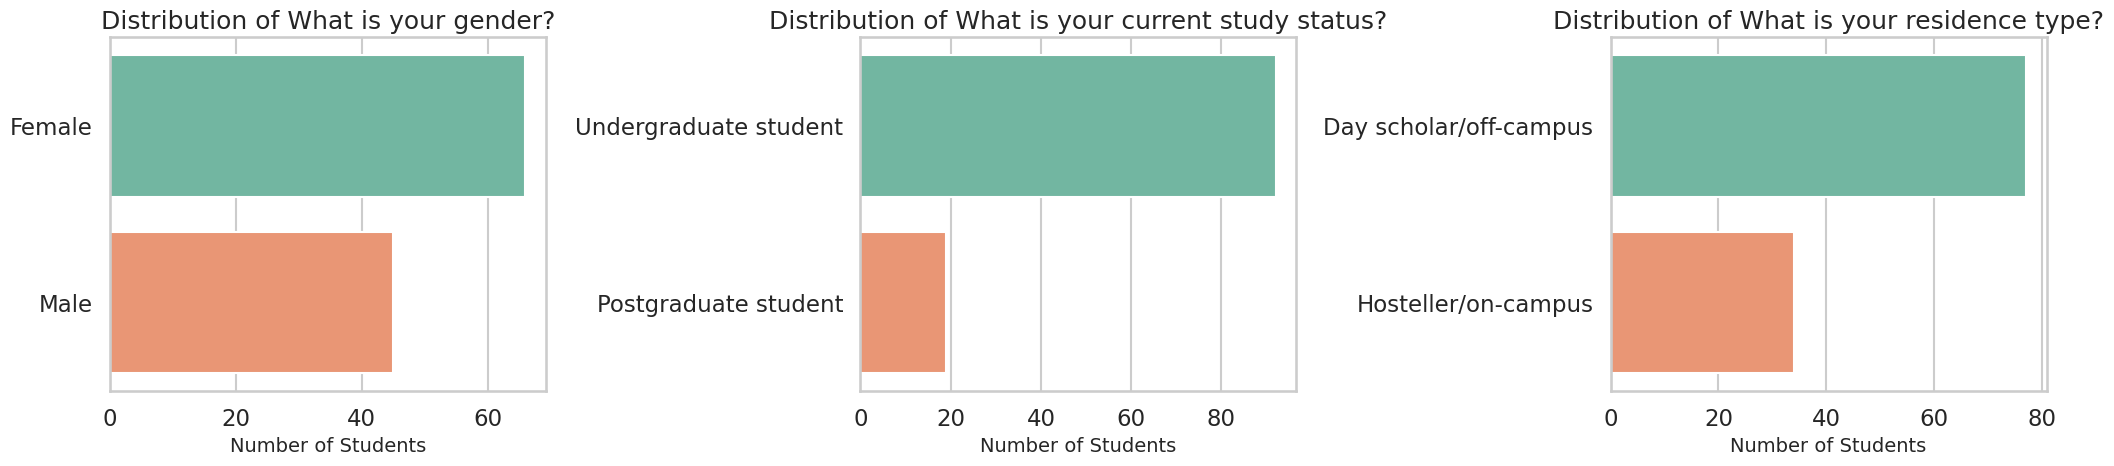

In [ ]:
fig, axes = plt.subplots(1, len(demographic_cols), figsize=(7 * len(demographic_cols), 5))

# Ensure axes is an array even for a single subplot
if len(demographic_cols) == 1:
    axes = [axes]

for i, col in enumerate(demographic_cols):
    sns.countplot(
        y=final_df[col],
        order=final_df[col].value_counts().index,
        palette="Set2",
        ax=axes[i] # Assign each plot to a specific subplot
    )
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel("Number of Students")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()

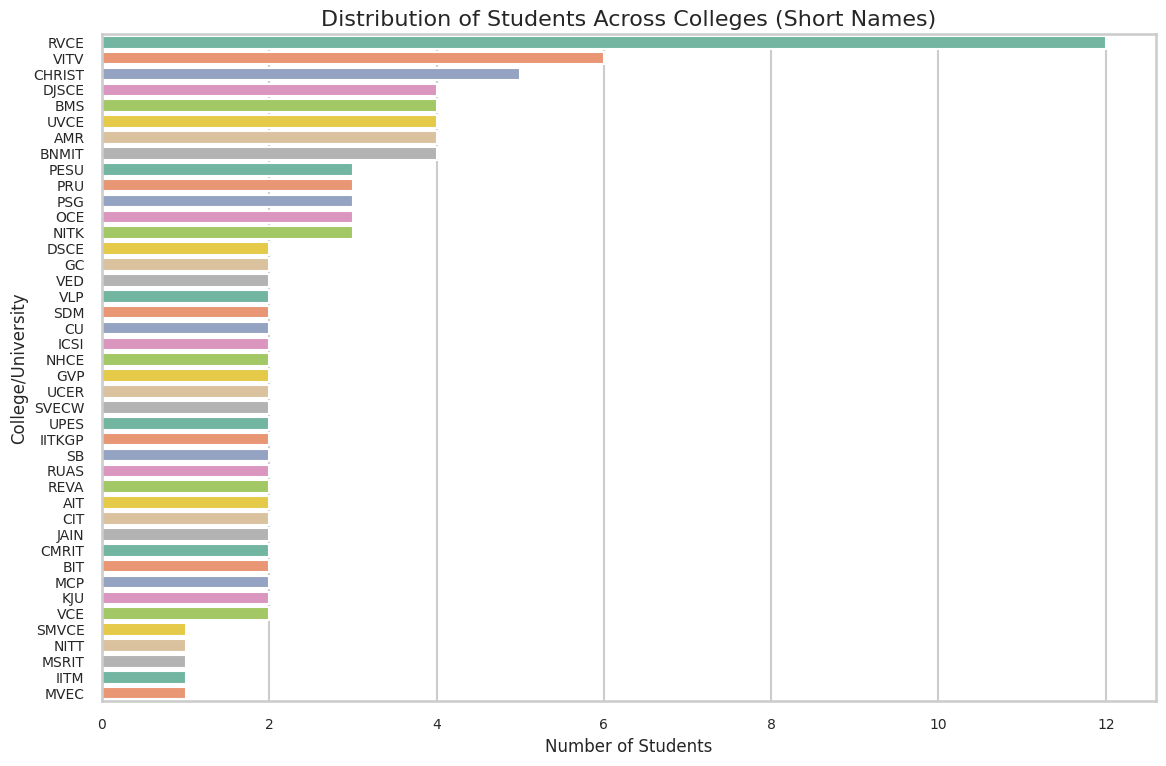

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(
    y=final_df["Short Name"],
    order=final_df["Short Name"].value_counts().index,
    palette="Set2"
)
plt.title("Distribution of Students Across Colleges (Short Names)", fontsize=16)
plt.xlabel("Number of Students", fontsize=12)
plt.ylabel("College/University", fontsize=12)
plt.yticks(fontsize=10) # Decrease font size for y-axis labels
plt.xticks(fontsize=10) # Decrease font size for x-axis labels
plt.tight_layout()
plt.show()

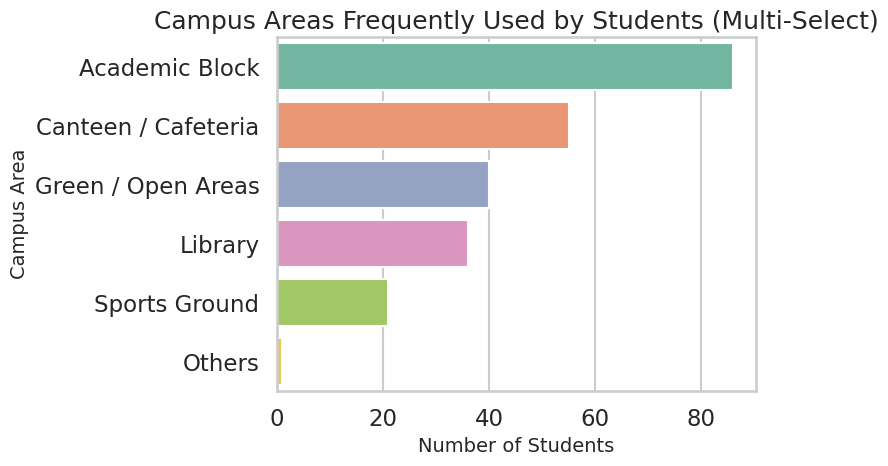

In [ ]:
area_keywords = {
    "Academic Block": ["academic"],
    "Canteen / Cafeteria": ["canteen", "cafeteria"],
    "Library": ["library"],
    "Sports Ground": ["sports", "ground"],
    "Green / Open Areas": ["garden", "green", "park"],
    "Others": ["hostel", "residence"]
}

for area, keywords in area_keywords.items():
    final_df[area] = final_df[
        "Which campus areas do you most frequently spend time in?"
    ].str.lower().str.contains(
        "|".join(keywords),
        regex=True,
        na=False
    ).astype(int)

area_counts = (
    final_df[list(area_keywords.keys())]
    .sum()
    .sort_values(ascending=False)
)

area_counts

plt.figure(figsize=(8,5))
sns.barplot(
    x=area_counts.values,
    y=area_counts.index,
    palette="Set2"
)

plt.title("Campus Areas Frequently Used by Students (Multi-Select)")
plt.xlabel("Number of Students")
plt.ylabel("Campus Area")
plt.tight_layout()
plt.show()

# College wise Analysis

In [ ]:
college_sentinel_indices_df = final_df.groupby('Short Name')[satellite_indices_cols].mean().reset_index()
college_sentinel_indices_df.head()

Short Name  NDVI_max  NDVI_mean  NDVI_min  NDVI_stdDev   NBR_max  NBR_mean  \
0        AIT  0.844027   0.245087 -0.062669     0.166184  0.536579  0.038622   
1        AMR  0.830618   0.495188 -0.220949     0.178382  0.650421  0.229583   
2        BIT  0.886481   0.244222 -0.375854     0.214860  0.603772  0.034655   
3        BMS  0.915066   0.270551 -0.036211     0.217419  0.706130  0.057473   
4      BNMIT  0.890016   0.280232 -0.045195     0.214290  0.646513  0.083260   

    NBR_min  NBR_stdDev  NDUI_max  ...  SAVI_min  SAVI_stdDev  UHSI_max  \
0 -0.322136    0.120350  0.378834  ... -0.093999     0.249239  1.817528   
1 -0.363881    0.187040  0.464370  ... -0.331334     0.267530  2.113484   
2 -0.550958    0.163752  0.623373  ... -0.563653     0.322241  1.947486   
3 -0.353616    0.169193  0.385866  ... -0.054312     0.326079  2.202928   
4 -0.374538    0.159349  0.470270  ... -0.067788     0.321388  2.038806   

   UHSI_mean  UHSI_min  UHSI_stdDev  Shade_max  Shade_mean  Shade_min  \
0   1.181932  0.906572     0.128442   1.062669    0.754913   0.155973   
1   1.481461  0.551827     0.226037   1.220949    0.504812   0.169382   
2   1.158279  0.572711     0.146362   1.375854    0.755778   0.113519   
3   1.183227  0.908378     0.173856   1.036211    0.729449   0.084934   
4   1.195776  0.897932     0.153746   1.045195    0.719768   0.109984   

   Shade_stdDev  
0      0.166184  
1      0.178382  
2      0.214860  
3      0.217419  
4      0.214290  

[5 rows x 61 columns]

## Sentinal Indices Analysis

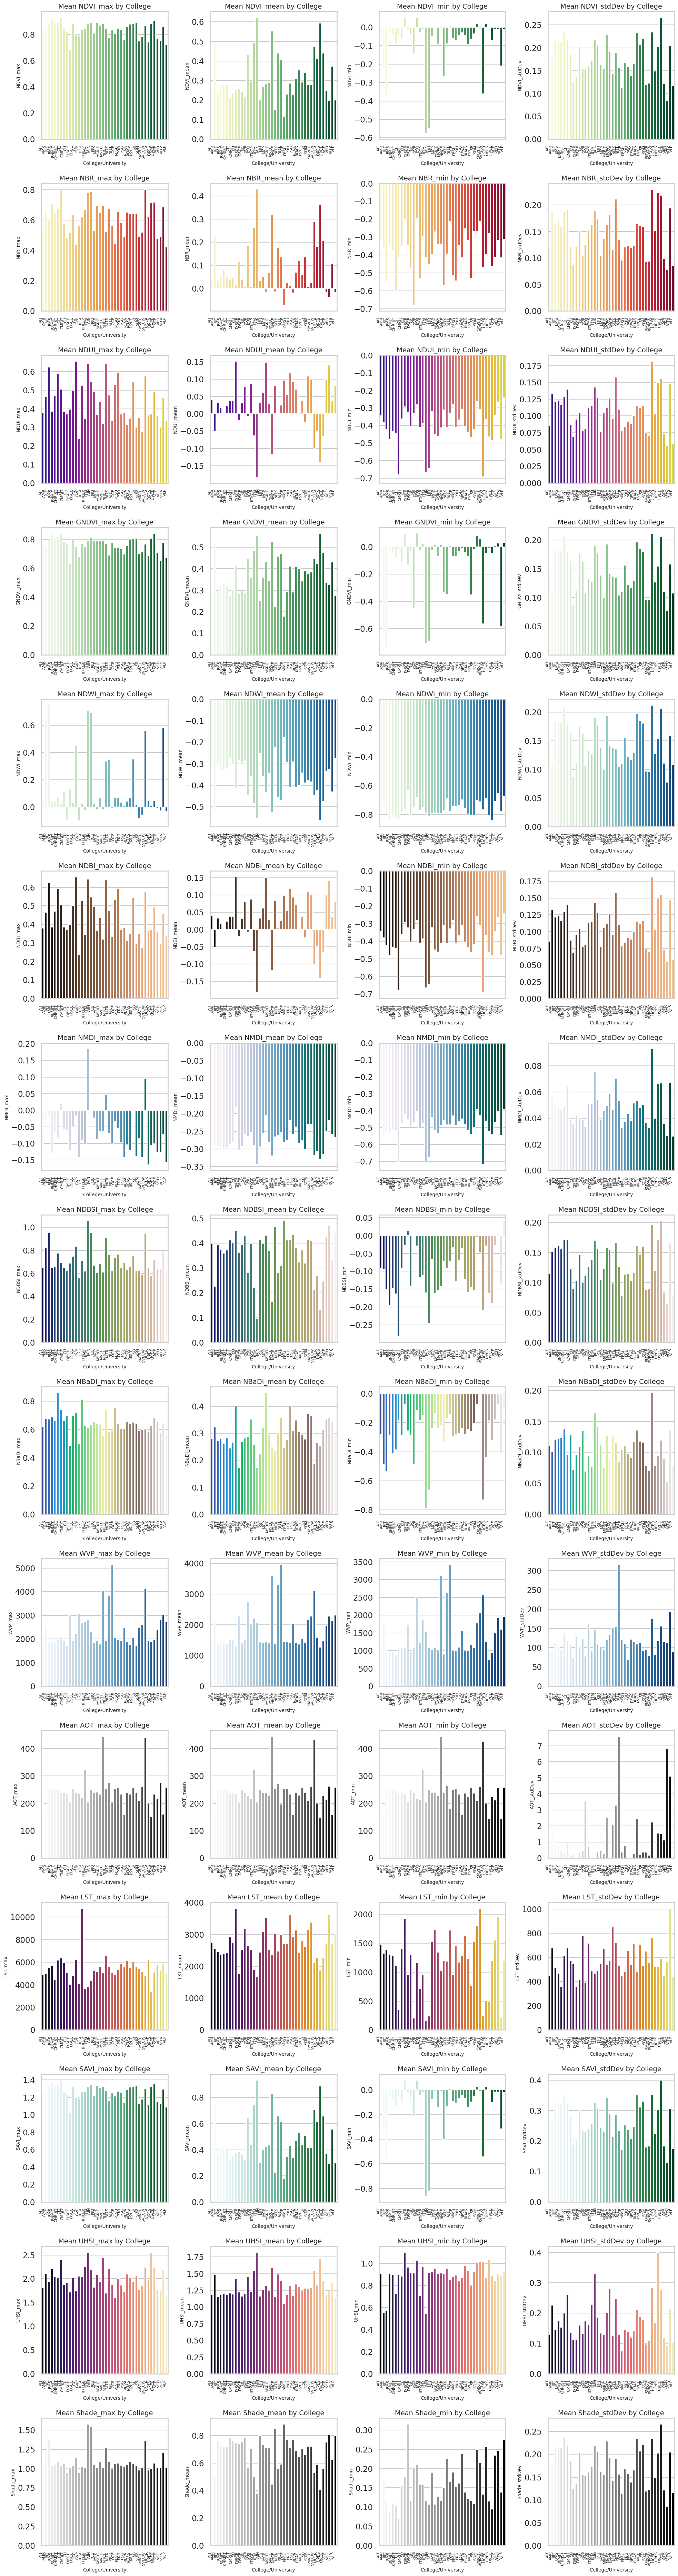

Generated bar plots for each sentinel index by college.


In [ ]:
# Define a mapping from sentinel index type to a suitable color palette
# palette_map = {
#     'NDVI': 'Greens',
#     'NBR': 'OrRd',
#     'NDUI': 'Blues',
#     'GNDVI': 'YlGn',
#     'NDWI': 'GnBu',
#     'NDBI': 'YlOrBr',
#     'NMDI': 'PuBuGn',
#     'NDBSI': 'Purples',
#     'NBaDI': 'BrBG',
#     'WVP': 'PuBu',
#     'AOT': 'Greys',
#     'LST': 'YlOrRd',
#     'SAVI': 'BuGn',
#     'UHSI': 'Reds',
#     'Shade': 'binary_r' # Reversed binary for shade
# }

palette_map = {
    # Vegetation indices
    'NDVI': 'YlGn',        # softer than Greens
    'GNDVI': 'Greens',
    'SAVI': 'BuGn',

    # Water / moisture
    'NDWI': 'GnBu',
    'NMDI': 'PuBuGn',
    'WVP': 'Blues',

    # Urban / built-up / bare
    'NDBI': 'copper',      # earthy urban tone
    'NDBSI': 'gist_earth', # soil/bare land feel
    'NBaDI': 'terrain',    # mixed brown/green natural

    # Heat / temperature
    'LST': 'inferno',      # MUCH better than YlOrRd (modern + readable)
    'UHSI': 'magma',       # urban heat → dark red/purple

    # Atmospheric / aerosol
    'AOT': 'Greys',

    # Burn index
    'NBR': 'YlOrRd',

    # Shade
    'Shade': 'gray_r'      # cleaner than binary_r
}


# 1. Calculate the number of rows and columns needed for the subplots
num_cols = 4
num_rows = math.ceil(len(satellite_indices_cols) / num_cols)

# 2. Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# 3. Iterate through each column in the satellite_indices_cols list
for i, col in enumerate(satellite_indices_cols):
    # a. Select the corresponding subplot
    ax = axes[i]

    # Determine the base index type (e.g., 'NDVI' from 'NDVI_max')
    index_type = col.split('_')[0]

    # Get the appropriate palette from the map, default to 'plasma' if not found
    current_palette = palette_map.get(index_type, 'plasma')

    # b. Create a bar plot
    sns.barplot(
        data=college_sentinel_indices_df,
        x='Short Name',
        y=col,
        palette=current_palette,
        ax=ax
    )

    # c. Set the title of the subplot
    ax.set_title(f'Mean {col} by College', fontsize=14)

    # d. Rotate the x-axis labels for readability and reduce font size
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', fontsize=8)

    # e. Set the x-label and y-label
    ax.set_xlabel('College/University', fontsize=10)
    ax.set_ylabel(col, fontsize=10)

# Remove any unused subplots
for j in range(len(satellite_indices_cols), num_rows * num_cols):
    fig.delaxes(axes[j])

# 4. Use plt.tight_layout() to prevent plot titles and labels from overlapping
plt.tight_layout()

# 5. Display the plots
plt.show()
print("Generated bar plots for each sentinel index by college.")

## LULC Indices Analysis

In [ ]:
lulc_ratio_cols_1 = [
    "1_ratio", "2_ratio", "3_ratio", "4_ratio",
    "5_ratio", "6_ratio", "7_ratio", "8_ratio"
]

# lulc_ratio_cols_2 = [
#     "png_1_ratio", "png_2_ratio", "png_3_ratio", "png_4_ratio",
#     "png_5_ratio", "png_6_ratio", "png_7_ratio", "png_8_ratio"
# ]

college_lulc_df_1 = final_df.groupby('Short Name')[lulc_ratio_cols_1].mean().reset_index()
# college_lulc_df_2 = final_df.groupby('Short Name')[lulc_ratio_cols_2].mean().reset_index()

print("College-wise LULC Ratios prepared:")
print(college_lulc_df_1.head())
# print("College-wise LULC Ratios prepared:")
# print(college_lulc_df_2.head())

College-wise LULC Ratios prepared:
  Short Name   1_ratio   2_ratio  3_ratio   4_ratio   5_ratio  6_ratio  \
0        AIT  0.000015  0.001068      0.0  0.829941  0.168976      0.0   
1        AMR  0.082870  0.019211      0.0  0.881073  0.016846      0.0   
2        BIT  0.004883  0.023590      0.0  0.749054  0.222473      0.0   
3        BMS  0.000336  0.038223      0.0  0.800323  0.161118      0.0   
4      BNMIT  0.000824  0.034821      0.0  0.756317  0.207626      0.0   

   7_ratio  8_ratio  
0      0.0      0.0  
1      0.0      0.0  
2      0.0      0.0  
3      0.0      0.0  
4      0.0      0.0  


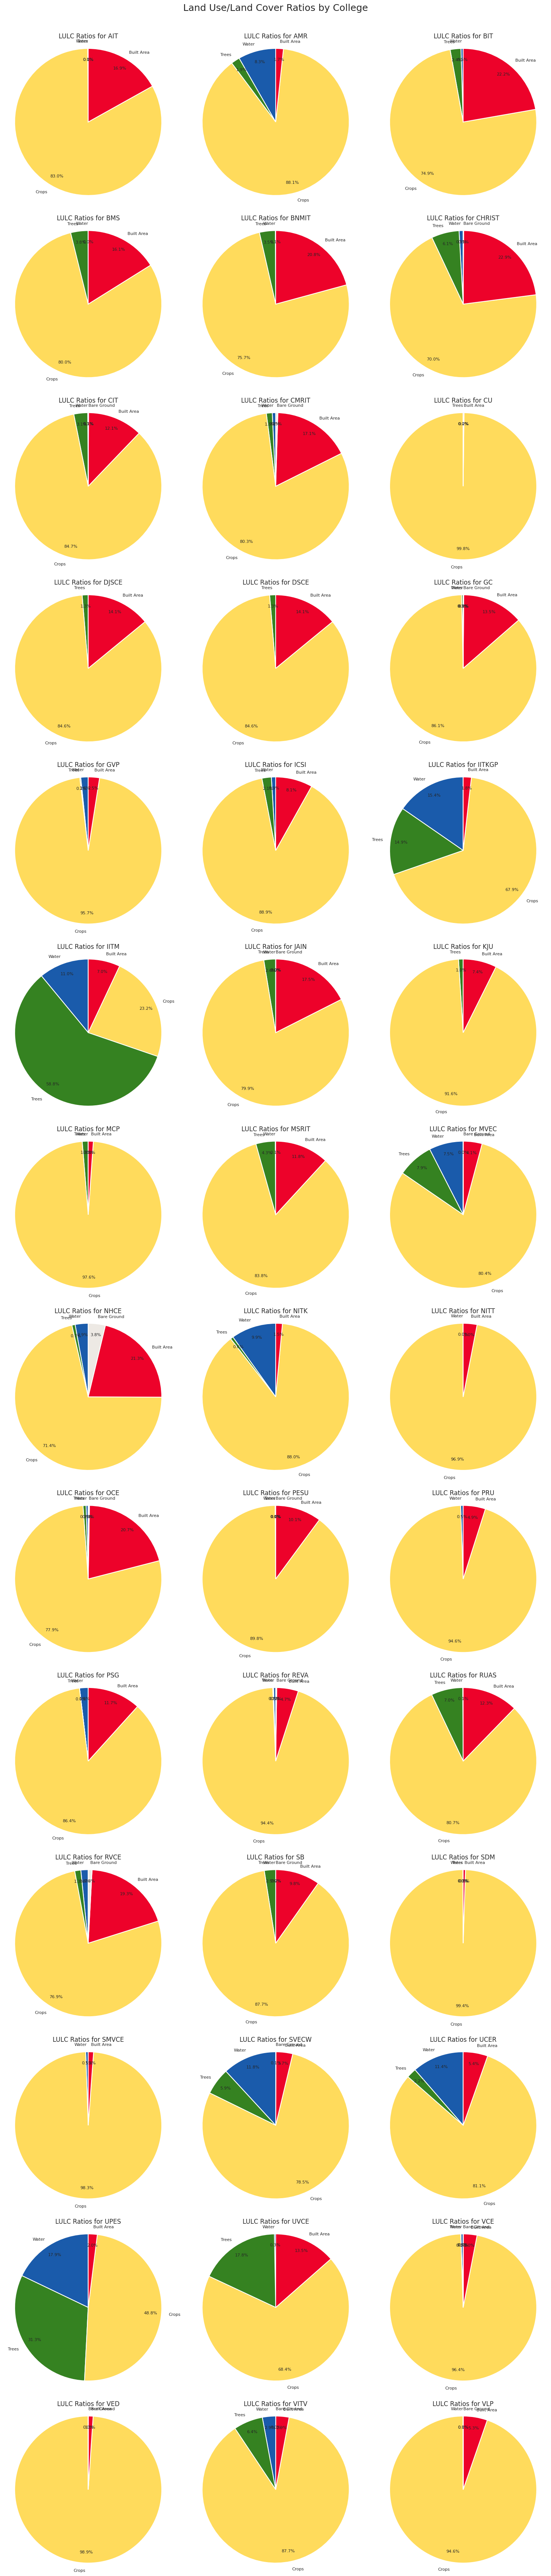

Generated pie charts for LULC ratios by college.


In [ ]:
num_cols = 3
num_rows = math.ceil(len(college_lulc_df_1) / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))
axes = axes.flatten()

# Mapping for LULC categories (assuming 1 to 8 represent specific categories)
# You might need to adjust these labels based on the actual meaning of 1_ratio to 8_ratio
lulc_labels = {
    "1_ratio": "Water",
    "2_ratio": "Trees",
    "3_ratio": "Flooded Vegetation",
    "4_ratio": "Crops",
    "5_ratio": "Built Area",
    "6_ratio": "Bare Ground",
    "7_ratio": "Snow/Ice",
    "8_ratio": "Clouds",
    "9_ratio": "Rangeland" # Although 9_ratio is not in lulc_ratio_cols, it's good to keep track for future if any.
}

lulc_colors = {
    "1_ratio": "#1A5BAB",  # Water
    "2_ratio": "#358221",  # Trees
    "3_ratio": "#87D19E",  # Flooded Vegetation
    "4_ratio": "#FFDB5C",  # Crops
    "5_ratio": "#ED022A",  # Built Area
    "6_ratio": "#EDE9E4",  # Bare Ground
    "7_ratio": "#F2FAFF",  # Snow/Ice
    "8_ratio": "#C8C8C8",  # Clouds
    "9_ratio": "#C6AD8D"   # Rangeland
}

for i, (index, row) in enumerate(college_lulc_df_1.iterrows()):
    ax = axes[i]
    college_name = row['Short Name']
    ratios = row[lulc_ratio_cols_1]

    # Filter out zero ratios for cleaner pie charts
    non_zero_ratios = ratios[ratios > 0]
    non_zero_labels = [lulc_labels.get(col, col) for col in non_zero_ratios.index]
    non_zero_colors = [lulc_colors[col] for col in non_zero_ratios.index]

    ax.pie(
        non_zero_ratios,
        labels=non_zero_labels,
        colors=non_zero_colors,
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.85,
        textprops={'fontsize': 8}
    )
    ax.set_title(f'LULC Ratios for {college_name}', fontsize=12)
    ax.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

# Remove any unused subplots
for j in range(len(college_lulc_df_1), num_rows * num_cols):
    fig.delaxes(axes[j])

plt.suptitle('Land Use/Land Cover Ratios by College', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust rect to make space for suptitle
plt.show()
print("Generated pie charts for LULC ratios by college.")

## Socio Urban Analysis

In [ ]:
college_urban_context_df = final_df.groupby('Short Name')[urban_context_cols].mean().reset_index()
print("College-wise urban context data prepared:")
print(college_urban_context_df.head())

College-wise urban context data prepared:
  Short Name  degree_of_urbanization  night_light_intensity  \
0        AIT                    30.0              60.955357   
1        AMR                    21.0               2.953214   
2        BIT                    30.0              59.150715   
3        BMS                    30.0              45.293571   
4      BNMIT                    30.0              44.860714   

   population_density_per_km2  built_area_km2  built_height_m  msz_class  \
0                  640.214661        0.039891        5.053565       14.0   
1                  433.683777        0.027436        3.449415       23.0   
2                 1207.731445        0.075257        9.533622        1.0   
3                  354.369507        0.022084        2.797479        2.0   
4                  725.294006        0.045207        5.726102       14.0   

   gis_occurence  NO2_mol_per_m2  pm25(microg/10m3)  
0            3.0        0.000066           2.886667  
1            5

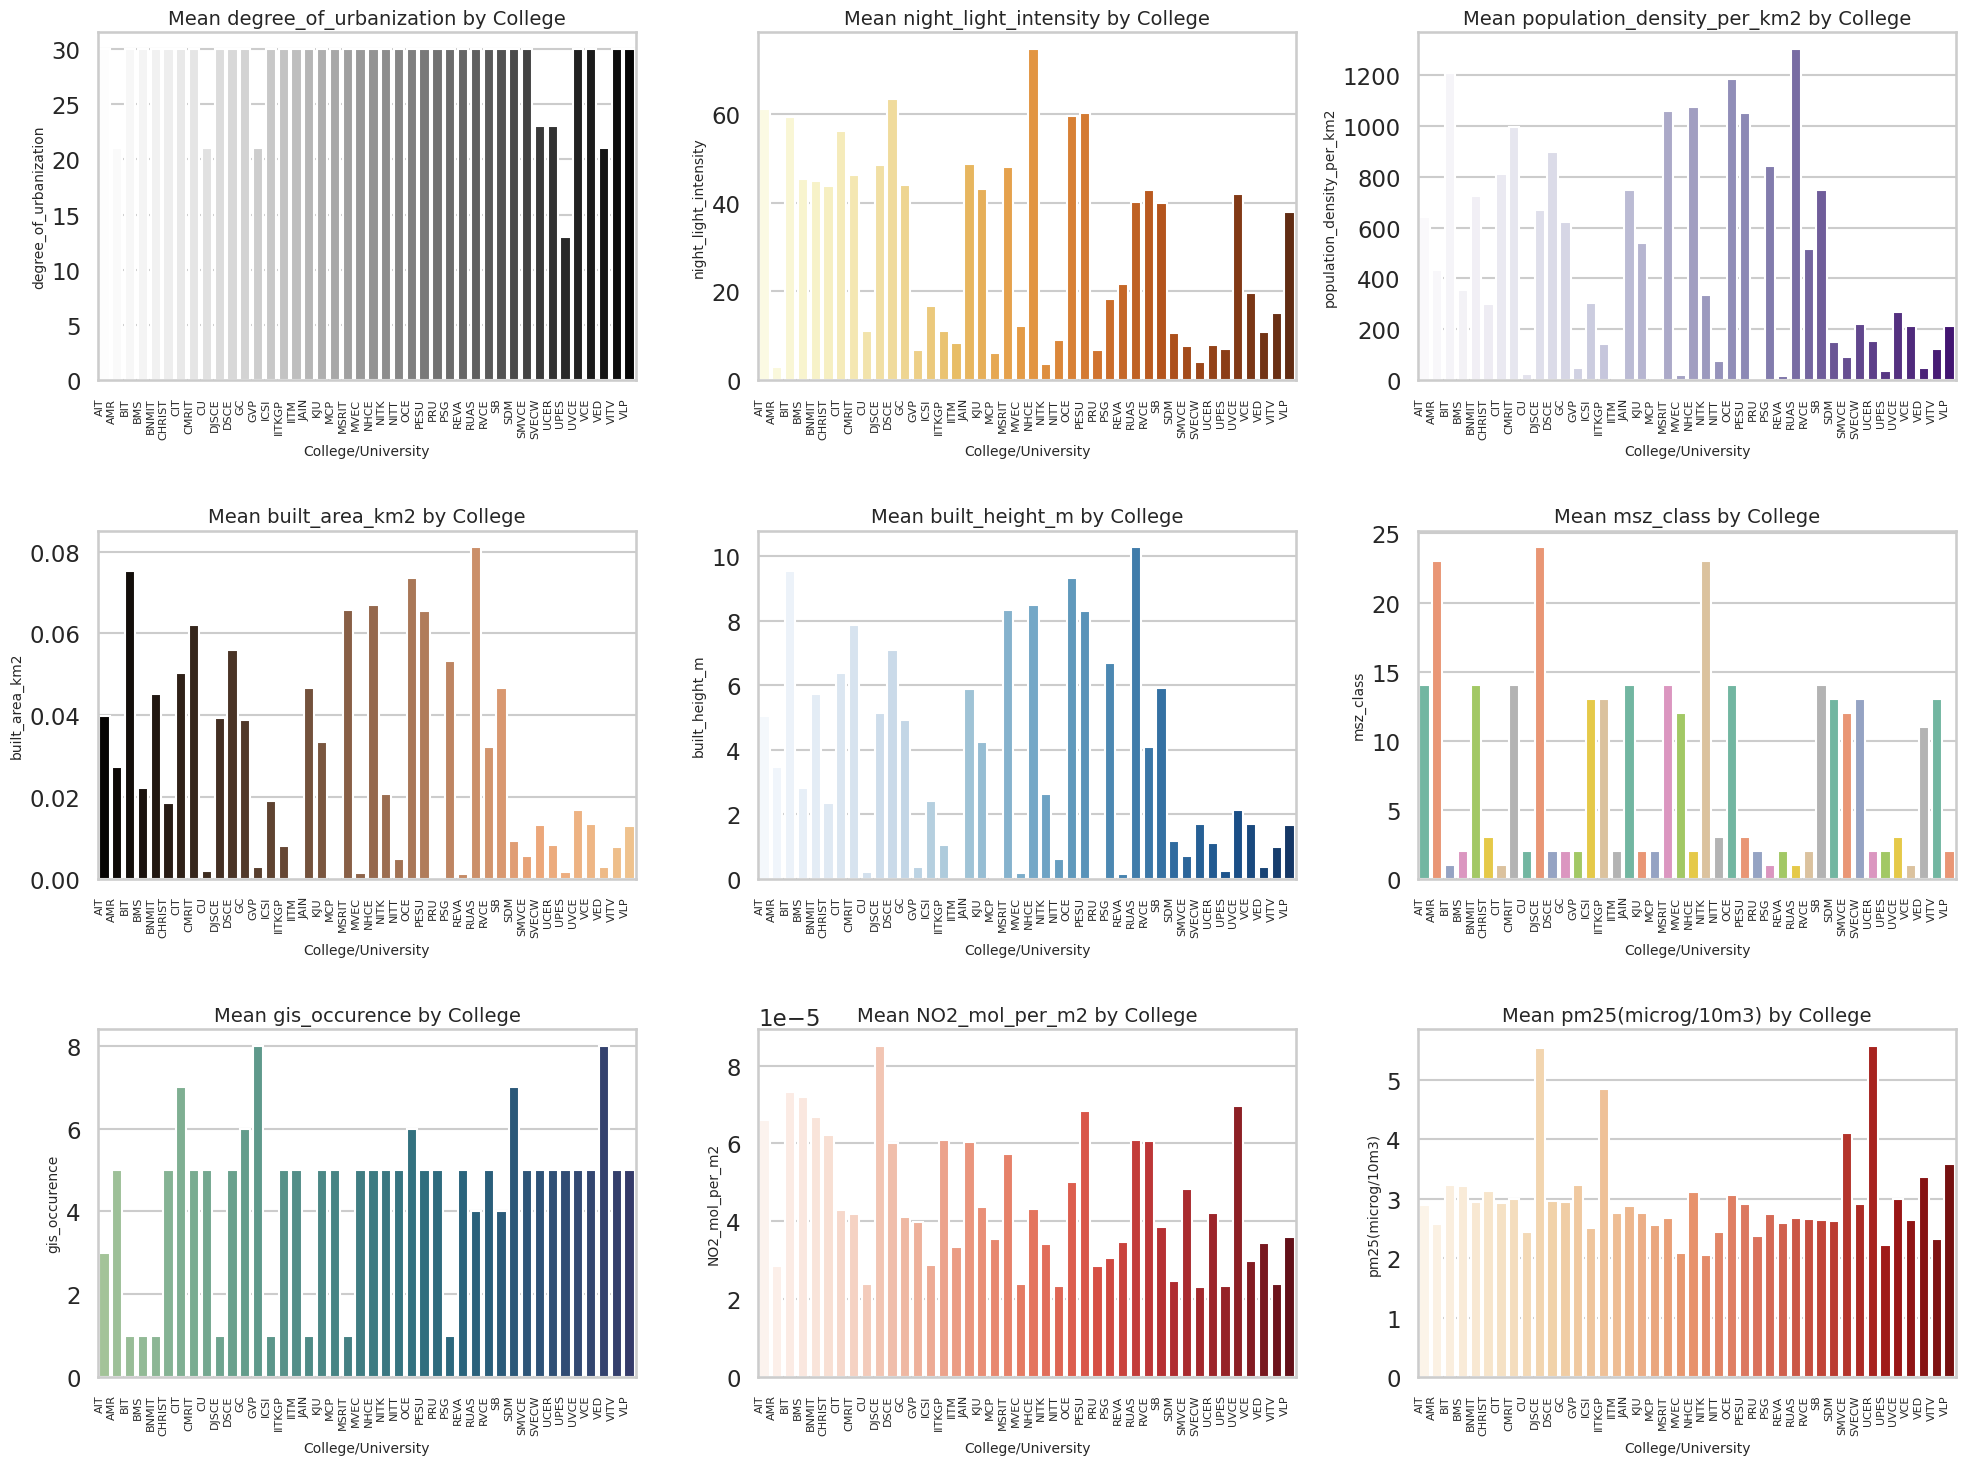

Generated bar plots for each socio-urban index by college.


In [ ]:
# 1. Determine the number of rows and columns needed for the subplots
num_cols = 3
num_rows = math.ceil(len(urban_context_cols) / num_cols)

palette_map = {
    "degree_of_urbanization": "Greys",
    "night_light_intensity": "YlOrBr",
    "population_density_per_km2": "Purples",
    "built_area_km2": "copper",
    "built_height_m": "Blues",
    "msz_class": "Set2",
    "gis_occurence": "crest",
    "NO2_mol_per_m2": "Reds",
    "pm25(microg/10m3)": "OrRd"
}

# 2. Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

# 3. Flatten the axes array for easy iteration
axes = axes.flatten()

# 4. Iterate through each column in the urban_context_cols list
for i, col in enumerate(urban_context_cols):
    # a. Select the corresponding subplot
    ax = axes[i]

    # b. Create a bar plot
    sns.barplot(
        data=college_urban_context_df,
        x='Short Name',
        y=col,
        # palette='viridis',
        palette=palette_map.get(col, "viridis"),
        ax=ax
    )

    # c. Set the title of the subplot
    ax.set_title(f'Mean {col} by College', fontsize=14)

    # d. Rotate the x-axis labels for readability and reduce font size
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', fontsize=8)

    # e. Set the x-label and y-label
    ax.set_xlabel('College/University', fontsize=10)
    ax.set_ylabel(col, fontsize=10)

# 5. Remove any unused subplots
for j in range(len(urban_context_cols), num_rows * num_cols):
    fig.delaxes(axes[j])

# 6. Use plt.tight_layout() to prevent plot titles and labels from overlapping
plt.tight_layout()

# 7. Display the plots
plt.show()
print("Generated bar plots for each socio-urban index by college.")

# Psychometric Analysis

### Students' perceptions of their Campuses

Text(0.5, 0, '')

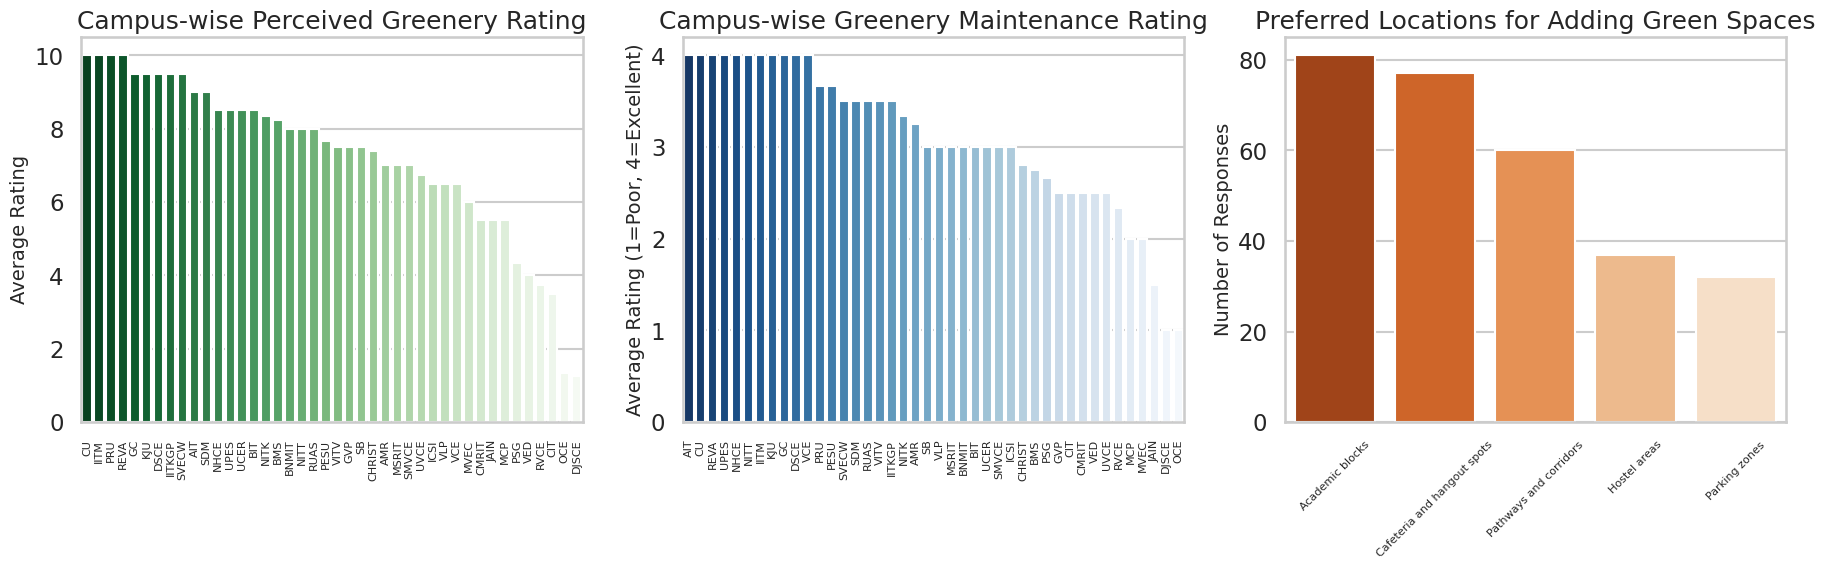

In [ ]:
# =========================
# UNIVARIATE ANALYSIS – SURVEY BASED (GREEN & WELL-BEING)
# Dataset already loaded as final_df
# =========================

college_col = "Short Name"

# -------------------------------------------------
# 1. CHANGE OF STRESS, FOCUS, MENTAL REFRESHMENT (PIE CHARTS) - COMMENTED OUT
# -------------------------------------------------
# ... (previous commented-out code for stress/focus/refreshment pies)

# -------------------------------------------------
# 2. CAMPUS VS PERCEIVED GREENERY SCORE (SURVEY RATING)
# -------------------------------------------------
green_rating_col = "How visually green do you consider your campus?"
campus_green_rating = (
    final_df.groupby(college_col)[green_rating_col]
    .mean()
    .sort_values(ascending=False)
)

# -------------------------------------------------
# 3. MAINTENANCE OF GREENERY – CAMPUS WISE
# -------------------------------------------------
maint_col = "How would you rate the maintenance of greenery around your frequent spaces?"

# Define an ordinal mapping for maintenance ratings
maintenance_mapping = {
    'Poor': 1,
    'Average': 2,
    'Good': 3,
    'Excellent': 4
}

# Apply the mapping to the maintenance column, then calculate the mean
campus_maint = (
    final_df.groupby(college_col)[maint_col]
    .apply(lambda x: x.map(maintenance_mapping).mean())
    .sort_values(ascending=False)
)

# -------------------------------------------------
# 4. GREEN SPACE ADDITION – WHERE TO ADD (MULTI-SELECT HANDLING)
# -------------------------------------------------
add_green_col = "Where do you think additional greenery should be prioritized on campus?"
multi_values = (
    final_df[add_green_col]
    .dropna()
    .str.split(",")
    .explode()
    .str.strip()
)
green_add_counts = multi_values.value_counts()

# -------------------------------------------------
# 5. WILLINGNESS FOR OPEN-AIR / GARDEN-BASED CLASSES (PIE)
# -------------------------------------------------
open_air_col = "Would you support open-air or garden-based classes for certain subjects?"
open_air_counts = final_df[open_air_col].value_counts()

# -------------------------------------------------
# 6. IMPACT OF MAKING CAMPUS 25% GREENER (PIE)
# -------------------------------------------------
impact_col = (
    "If your campus were made 25% greener, "
    "how would this impact your mental health and motivation (self-assessed improvement)?"
)
impact_counts = final_df[impact_col].value_counts()

# ==================================================================
# COMBINED PLOTTING
# ==================================================================

fig, axes = plt.subplots(1, 3, figsize=(22, 5)) # 1 row, 3 columns

# --- Row 1: Bar Charts ---
# Plot 1: Campus-wise Perceived Greenery Rating
sns.barplot(x=campus_green_rating.index, y=campus_green_rating.values, palette="Greens_r", ax=axes[0])
axes[0].set_title("Campus-wise Perceived Greenery Rating")
axes[0].set_ylabel("Average Rating")
axes[0].tick_params(axis='x', rotation=90, labelsize=8)
axes[0].set_xlabel("")

# Plot 2: Campus-wise Greenery Maintenance Rating
sns.barplot(x=campus_maint.index, y=campus_maint.values, palette="Blues_r", ax=axes[1])
axes[1].set_title("Campus-wise Greenery Maintenance Rating")
axes[1].set_ylabel("Average Rating (1=Poor, 4=Excellent)")
axes[1].tick_params(axis='x', rotation=90, labelsize=8)
axes[1].set_xlabel("")

# Plot 3: Preferred Locations for Adding Green Spaces
sns.barplot(x=green_add_counts.index, y=green_add_counts.values, palette="Oranges_r", ax=axes[2])
axes[2].set_title("Preferred Locations for Adding Green Spaces")
axes[2].set_ylabel("Number of Responses")
axes[2].tick_params(axis='x', rotation=45, labelsize=8) # Removed ha='right'
axes[2].set_xlabel("")

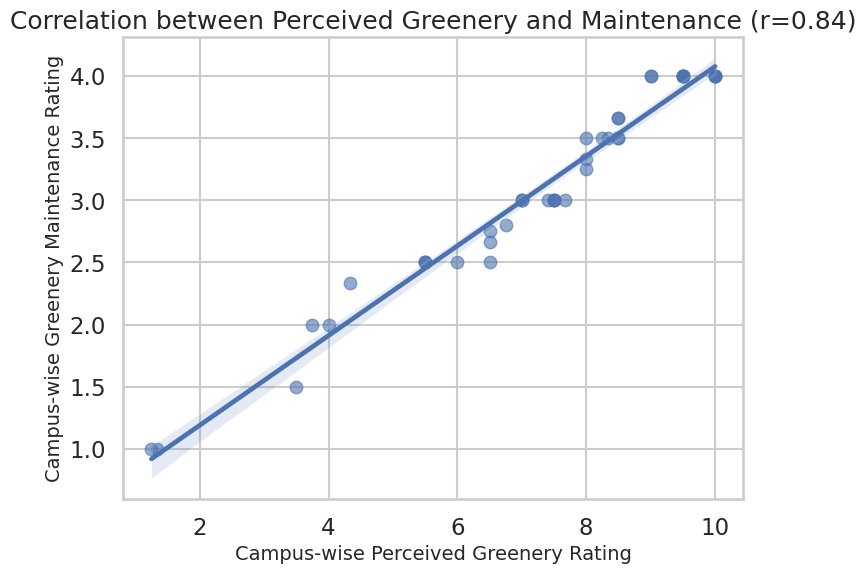

In [ ]:
# variation between Campus-wise Perceived Greenery Rating and Campus-wise Greenery Maintenance Rating
correlation = campus_green_rating.corr(campus_maint)

plt.figure(figsize=(8, 6))
sns.regplot(x=campus_green_rating, y=campus_maint, scatter_kws={'alpha':0.6})
plt.title(f'Correlation between Perceived Greenery and Maintenance (r={correlation:.2f})')
plt.xlabel('Campus-wise Perceived Greenery Rating')
plt.ylabel('Campus-wise Greenery Maintenance Rating')
plt.grid(True)
plt.show()

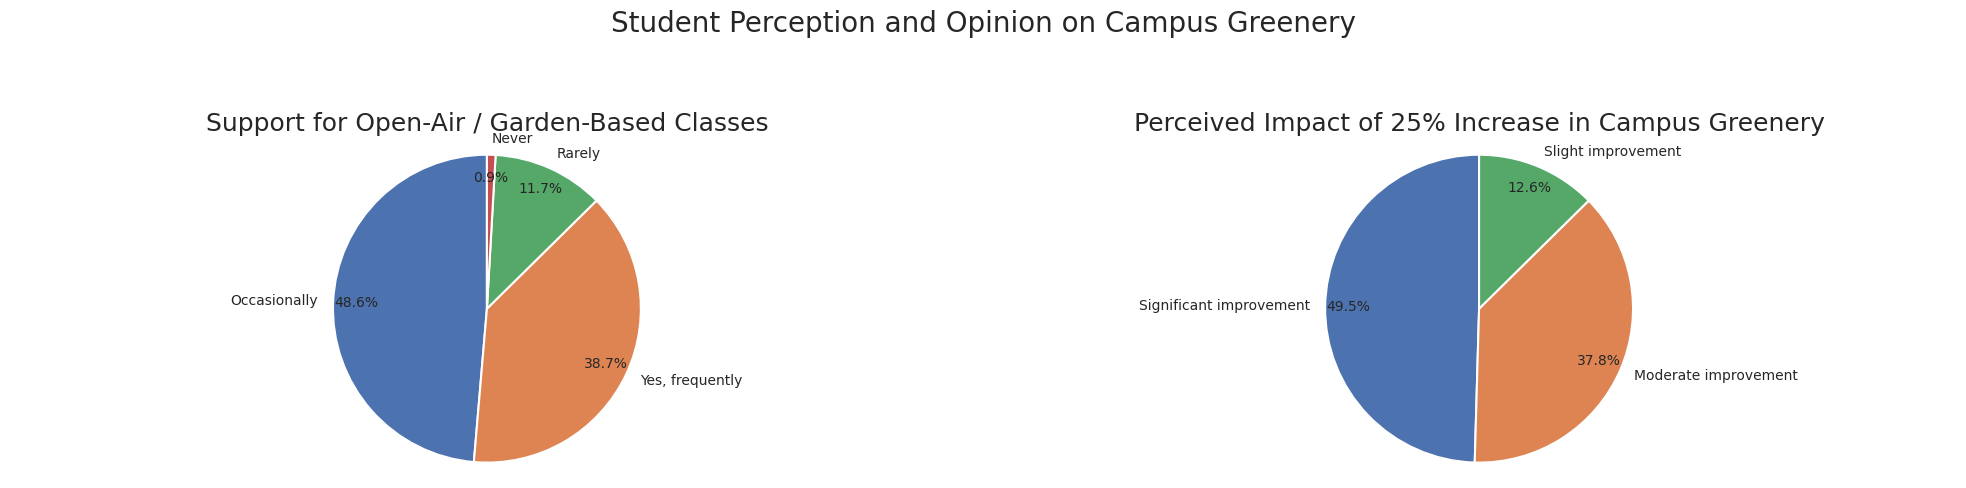

In [ ]:
# --- Row 2: Pie Charts ---
# Plot 4: Support for Open-Air / Garden-Based Classes
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
axes[0].pie(open_air_counts, labels=open_air_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, textprops={'fontsize': 10})
axes[0].set_title("Support for Open-Air / Garden-Based Classes")
axes[0].axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

# Plot 5: Impact of Making Campus 25% Greener
axes[1].pie(impact_counts, labels=impact_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, textprops={'fontsize': 10})
axes[1].set_title("Perceived Impact of 25% Increase in Campus Greenery")
axes[1].axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

# There are no unused subplots when creating 1 row and 2 columns with plt.subplots(1, 2).
# If you intended to have 2 rows and 3 columns, the fig, axes = plt.subplots(...) call should be changed accordingly.
# For now, removing the delaxes call as it's trying to delete a non-existent subplot.

plt.suptitle("Student Perception and Opinion on Campus Greenery", fontsize=20, y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust rect to make space for suptitle
plt.show()

### Some data preprocessing for further analysis

In [ ]:
# In-depth campus green / wellbeing analysis
# - Assumes a pandas DataFrame named `final_df` is available.
# - If not available, tries to read "merged_college_data.csv".
# -------------------------
# Load dataframe (defensive)
# -------------------------
try:
    df = final_df
except NameError:
    df = pd.read_csv("merged_college_data.csv")

# Normalize column search helper
def find_col(df, keywords, prefer=None):
    """
    Find a column in df whose name contains any of the keywords (case-insensitive).
    If prefer is given, prefer columns containing that substring.
    Returns column name or None.
    """
    cols = df.columns.tolist()
    keywords = [k.lower() for k in (keywords if isinstance(keywords, (list,tuple)) else [keywords])]
    candidate = []
    for c in cols:
        cl = c.lower()
        if any(k in cl for k in keywords):
            candidate.append(c)
    if not candidate:
        return None
    if prefer:
        pref = [c for c in candidate if prefer.lower() in c.lower()]
        if pref:
            return pref[0]
    return candidate[0]

# -------------------------
# Map / detect important columns
# -------------------------
college_col = find_col(df, ["which college", "college/university", "college", "institution"], prefer="Which college")
ndvi_col = find_col(df, ["ndvi_mean", "ndvi mean", "greenness"])
mood_col = find_col(df, ["mood", "overall mood", "rate your overall mood", "rate your mood"])
stress_col = find_col(df, ["stress level", "stress", "average stress"])
focus_col = find_col(df, ["concentration", "focus change", "focus", "concentration/focus"])
refresh_col = find_col(df, ["mentally refreshed", "mental refresh", "refresh"])
time_green_col = find_col(df, ["time spent", "time_in_green", "time spent in green", "hours in green", "time spent in green spaces", "time_spent_green"], prefer="time spent in open green areas")
popdens_col = find_col(df, ["population_density", "population density", "population_density_per_km2", "population"])
nightlight_col = find_col(df, ["night_light", "nightlight", "night light"])
urban_col = find_col(df, ["degree_of_urbanization", "urban", "urbanisation", "urbanization", "urban type"], prefer="degree_of_urbanization")
ndbi_col = find_col(df, ["ndbi", "ndbi_mean", "built-up index"])
built_area_col = find_col(df, ["built_area", "built area", "built_area_km2", "area_km2", "area_km"])

# Fallbacks & sanity messages
print("Detected columns:")
print(f" college_col: {college_col}")
print(f" ndvi_col: {ndvi_col}")
print(f" ndbi_col: {ndbi_col}")
print(f" built_area_col: {built_area_col}")
print(f" mood_col: {mood_col}")
print(f" stress_col: {stress_col}")
print(f" focus_col: {focus_col}")
print(f" refresh_col: {refresh_col}")
print(f" time_green_col: {time_green_col}")
print(f" popdens_col: {popdens_col}")
print(f" nightlight_col: {nightlight_col}")
print(f" urban_col: {urban_col}")

Detected columns:
 college_col: Which college/university do you study in?
 ndvi_col: NDVI_mean
 ndbi_col: NDBI_max
 built_area_col: On a typical day, how much  of your total time do you spend in closed built areas on campus?
 mood_col: How would you rate your overall mood generally on a scale from 1 to 10
 stress_col: How would you describe your average stress level?
 focus_col: How does your concentration/focus change in green over non-green areas?
 refresh_col: How often do you feel mentally refreshed after being outdoors in greenery?
 time_green_col: None
 popdens_col: population_density_per_km2
 nightlight_col: night_light_intensity
 urban_col: degree_of_urbanization


In [ ]:
# -------------------------
# Preprocess / cleaning
# -------------------------
# Ensure college column exists
if college_col is None:
    raise ValueError("Could not find a college column. Please name it 'Which college/university do you study in?' or similar.")

# Convert mood and stress to numeric if possible
def safe_numeric(series):
    """Try to convert to float, coerce otherwise."""
    return pd.to_numeric(series, errors="coerce")

if mood_col:
    df[mood_col] = safe_numeric(df[mood_col])

if stress_col:
    df[stress_col] = safe_numeric(df[stress_col])

# Focus categories handling: keep raw categories and create boolean improved
# Determine which text values denote improvement:
focus_improvement_vals = ["improves slightly", "improves significantly", "improves", "better", "increase", "improved"]
# standardize lowercase
if focus_col:
    df["_focus_raw"] = df[focus_col].astype(str).str.strip()
    df["_focus_low"] = df["_focus_raw"].str.lower()

    # Identify improvement vs no-change vs worse
    df["_focus_improved"] = df["_focus_low"].apply(lambda x: any(k in x for k in focus_improvement_vals))
else:
    df["_focus_raw"] = np.nan
    df["_focus_low"] = np.nan
    df["_focus_improved"] = False

# If NDVI not found, try to approximate by %green columns if any exist (skip if not)
if ndvi_col is None:
    candidate_green_cols = [c for c in df.columns if "ndvi" in c.lower() or ("green" in c.lower() and "percent" in c.lower())]
    ndvi_col = candidate_green_cols[0] if candidate_green_cols else None

# Derive urban classification if explicit column missing
if urban_col is None:
    # use population density thresholds if available
    if popdens_col:
        df["_popdens"] = pd.to_numeric(df[popdens_col], errors="coerce").fillna(0)
        # thresholds (can be tuned)
        bins = [ -1, 300, 1000, 1e9 ]
        labels = ["Rural", "Suburban", "Urban"]
        df["_urban_class"] = pd.cut(df["_popdens"], bins=bins, labels=labels)
        urban_col_use = "_urban_class"
    else:
        # fallback: try to find 'urban' tokens in other columns
        urban_col_use = None
else:
    urban_col_use = urban_col

# --- NEW ADDITION ---
# If urban_col_use is 'degree_of_urbanization', convert it to a categorical label for plotting
if urban_col_use == 'degree_of_urbanization':
    def map_degree_to_label(degree):
        if degree == 13:
            return "Rural"
        elif degree in [21, 23]: # Grouping similar degrees as 'Suburban'
            return "Suburban"
        elif degree == 30:
            return "Urban"
        else:
            return "Other" # Catch-all for any unexpected degree values

    df['_urban_degree_label'] = df[urban_col_use].apply(map_degree_to_label)
    urban_col_use = '_urban_degree_label' # Now use this new categorical column
# --- END NEW ADDITION ---

# For "green campus" vs "not green": use NDVI median as threshold
if ndvi_col:
    df["_ndvi"] = pd.to_numeric(df[ndvi_col], errors="coerce")
    ndvi_median = df["_ndvi"].median()
    if np.isnan(ndvi_median):
        ndvi_median = 0.25  # fallback
        print("NDVI median not found; using fallback 0.25")
    df["_is_green_campus"] = df["_ndvi"] >= ndvi_median
else:
    # If NDVI absent, use "How visually green" survey column if exists
    visual_green_col = find_col(df, ["how visually green", "visually green", "visual green"])
    if visual_green_col:
        df["_vis_green"] = safe_numeric(df[visual_green_col])
        med = df["_vis_green"].median()
        df["_is_green_campus"] = df["_vis_green"] >= med
        ndvi_col = visual_green_col
        print(f"Using visual green rating column '{visual_green_col}' as NDVI proxy with median {med:.2f}")
    else:
        # last resort: assume everything unknown -> treat as False
        df["_is_green_campus"] = False
        print("Warning: No NDVI or visual green column found. _is_green_campus set to False for all rows.")

### Mood, Stress and Focus of Students

#### Comparing the metrics across different categories for analysis

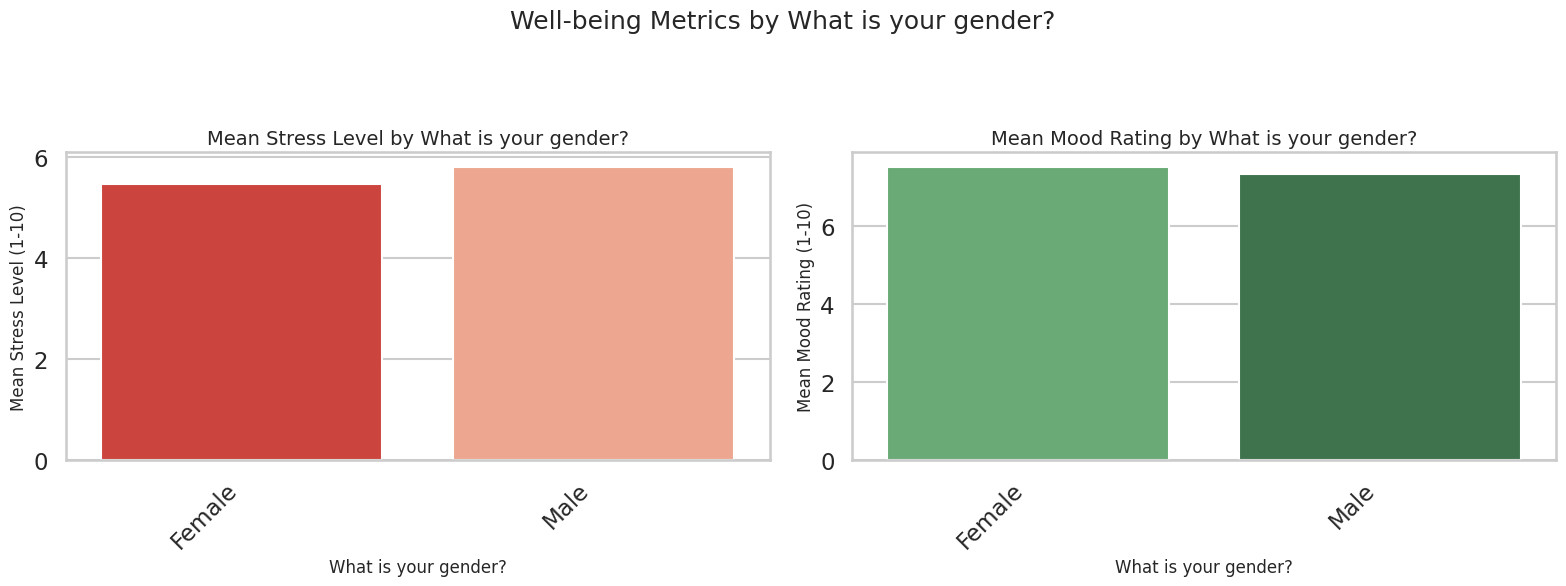

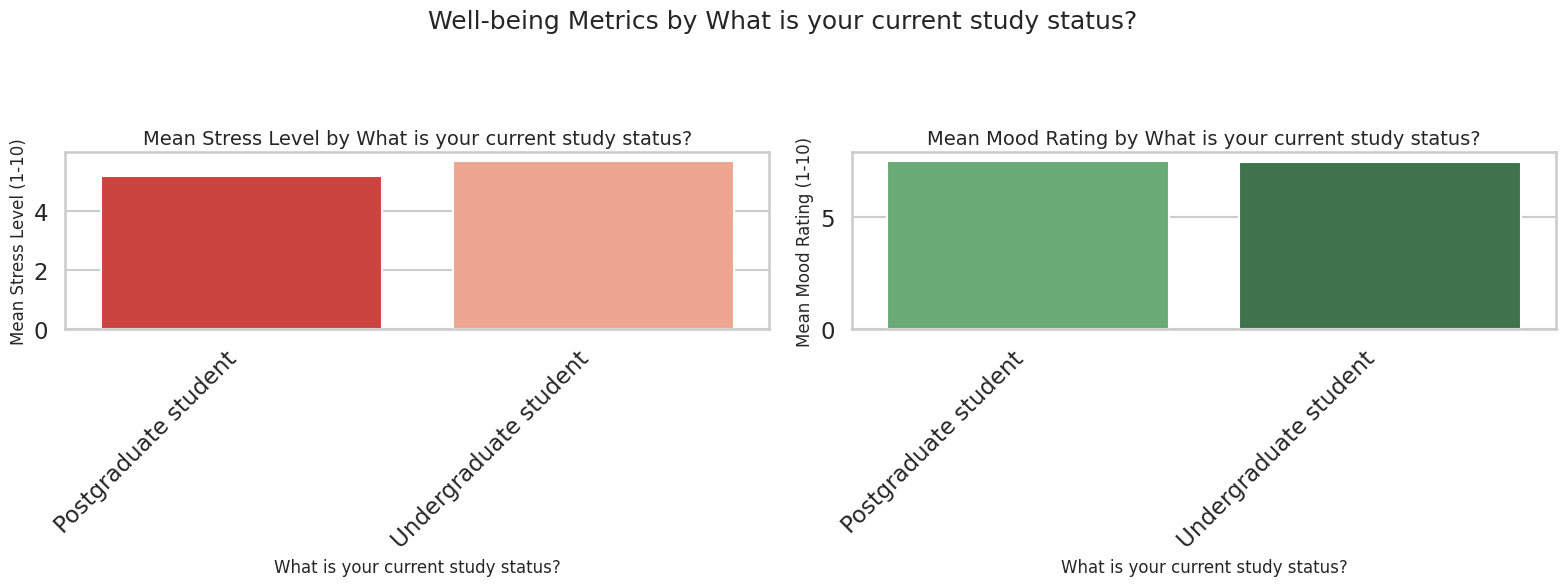

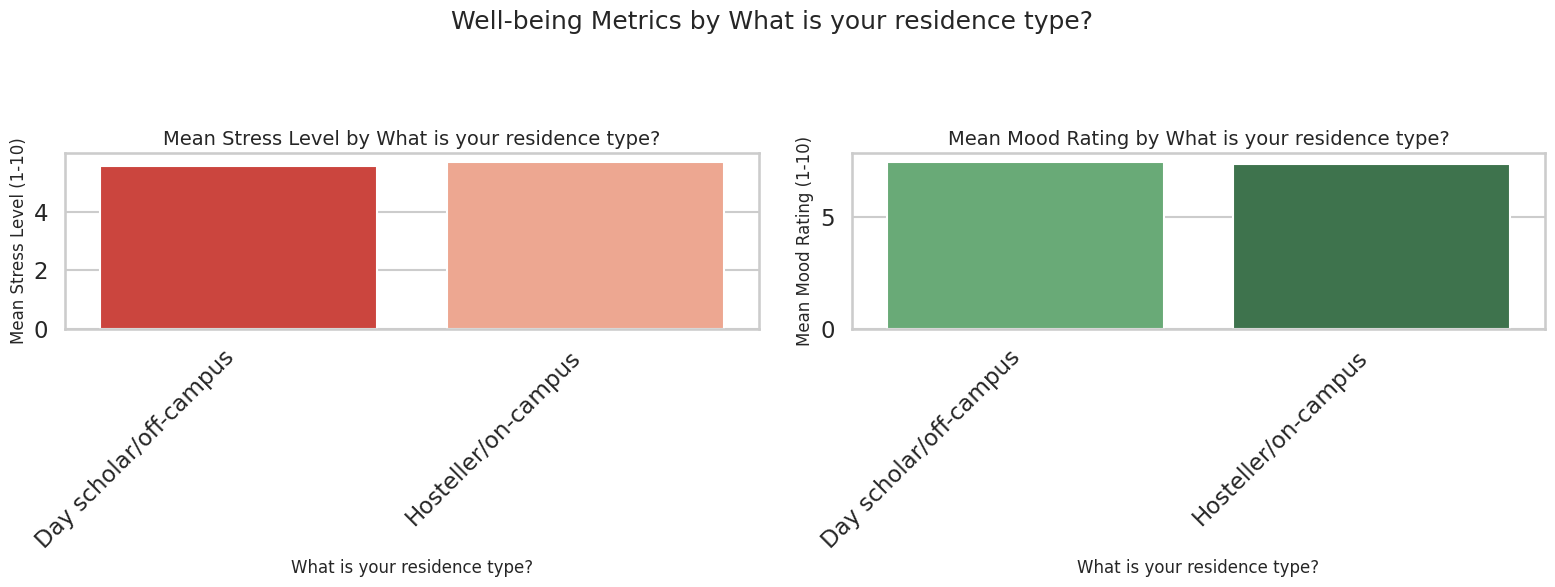

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure mood_col and stress_col are correctly identified from previous steps
# If not, re-detect them for robustness
if 'mood_col' not in locals():
    mood_col = "How would you rate your overall mood generally on a scale from 1 to 10"
if 'stress_col' not in locals():
    stress_col = "How would you describe your average stress level?"

# Iterate through each demographic column
for col in demographic_cols:
    # Group by the current demographic column and calculate mean stress and mood
    demographic_analysis = final_df.groupby(col).agg({
        stress_col: 'mean',
        mood_col: 'mean'
    }).reset_index()

    # Create a figure with two subplots side-by-side
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'Well-being Metrics by {col}', fontsize=18, y=1.02)

    # Plot 1: Mean Stress Level
    sns.barplot(
        x=demographic_analysis[col],
        y=demographic_analysis[stress_col],
        palette='Reds_r', # Reversed reds for stress (higher is worse)
        ax=axes[0]
    )
    axes[0].set_title(f'Mean Stress Level by {col}', fontsize=14)
    axes[0].set_xlabel(col, fontsize=12)
    axes[0].set_ylabel('Mean Stress Level (1-10)', fontsize=12)
    axes[0].tick_params(axis='x', rotation=45) # Rotate for readability
    plt.setp(axes[0].get_xticklabels(), ha='right') # Apply horizontal alignment directly to labels

    # Plot 2: Mean Mood Rating
    sns.barplot(
        x=demographic_analysis[col],
        y=demographic_analysis[mood_col],
        palette='Greens_d', # Darker greens for mood (higher is better)
        ax=axes[1]
    )
    axes[1].set_title(f'Mean Mood Rating by {col}', fontsize=14)
    axes[1].set_xlabel(col, fontsize=12)
    axes[1].set_ylabel('Mean Mood Rating (1-10)', fontsize=12)
    axes[1].tick_params(axis='x', rotation=45) # Rotate for readability
    plt.setp(axes[1].get_xticklabels(), ha='right') # Apply horizontal alignment directly to labels

    # Adjust layout and display plots
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

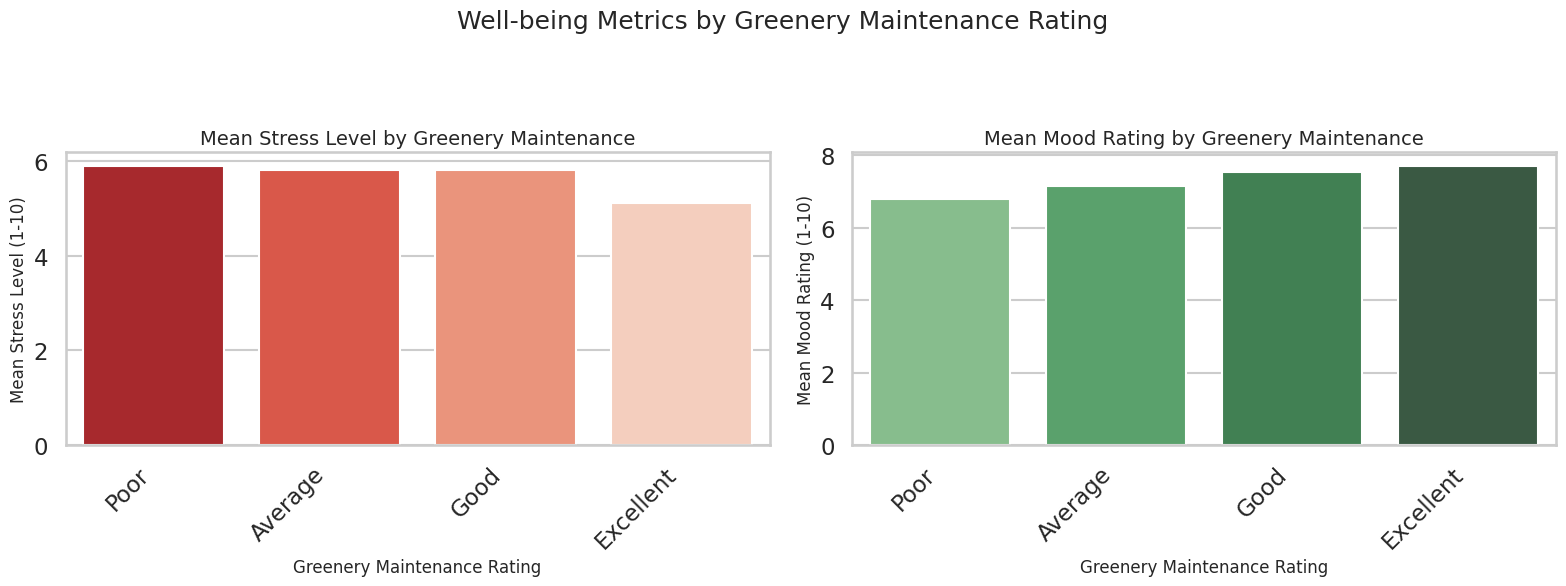

In [ ]:
# Ensure mood_col and stress_col are correctly identified
if 'mood_col' not in locals():
    mood_col = "How would you rate your overall mood generally on a scale from 1 to 10"
if 'stress_col' not in locals():
    stress_col = "How would you describe your average stress level?"

maint_col = "How would you rate the maintenance of greenery around your frequent spaces?"

# Define an ordinal mapping for maintenance ratings (re-using if available, or defining)
maintenance_mapping = {
    'Poor': 1,
    'Average': 2,
    'Good': 3,
    'Excellent': 4
}

# Apply the mapping to the maintenance column, then calculate the mean
# Create a temporary numeric column for sorting
final_df['_maintenance_numeric'] = final_df[maint_col].map(maintenance_mapping)

# Group by the original categorical column (sorted by the numeric mapping) and calculate means
maintenance_analysis = final_df.groupby(maint_col).agg({
    stress_col: 'mean',
    mood_col: 'mean',
    '_maintenance_numeric': 'first' # Keep numeric value for sorting
}).reset_index().sort_values(by='_maintenance_numeric')

# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Well-being Metrics by Greenery Maintenance Rating', fontsize=18, y=1.02)

# Plot 1: Mean Stress Level
sns.barplot(
    x=maintenance_analysis[maint_col],
    y=maintenance_analysis[stress_col],
    palette='Reds_r', # Reversed reds for stress (higher is worse)
    ax=axes[0]
)
axes[0].set_title('Mean Stress Level by Greenery Maintenance', fontsize=14)
axes[0].set_xlabel('Greenery Maintenance Rating', fontsize=12)
axes[0].set_ylabel('Mean Stress Level (1-10)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
plt.setp(axes[0].get_xticklabels(), ha='right')

# Plot 2: Mean Mood Rating
sns.barplot(
    x=maintenance_analysis[maint_col],
    y=maintenance_analysis[mood_col],
    palette='Greens_d', # Darker greens for mood (higher is better)
    ax=axes[1]
)
axes[1].set_title('Mean Mood Rating by Greenery Maintenance', fontsize=14)
axes[1].set_xlabel('Greenery Maintenance Rating', fontsize=12)
axes[1].set_ylabel('Mean Mood Rating (1-10)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
plt.setp(axes[1].get_xticklabels(), ha='right')

# Adjust layout and display plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

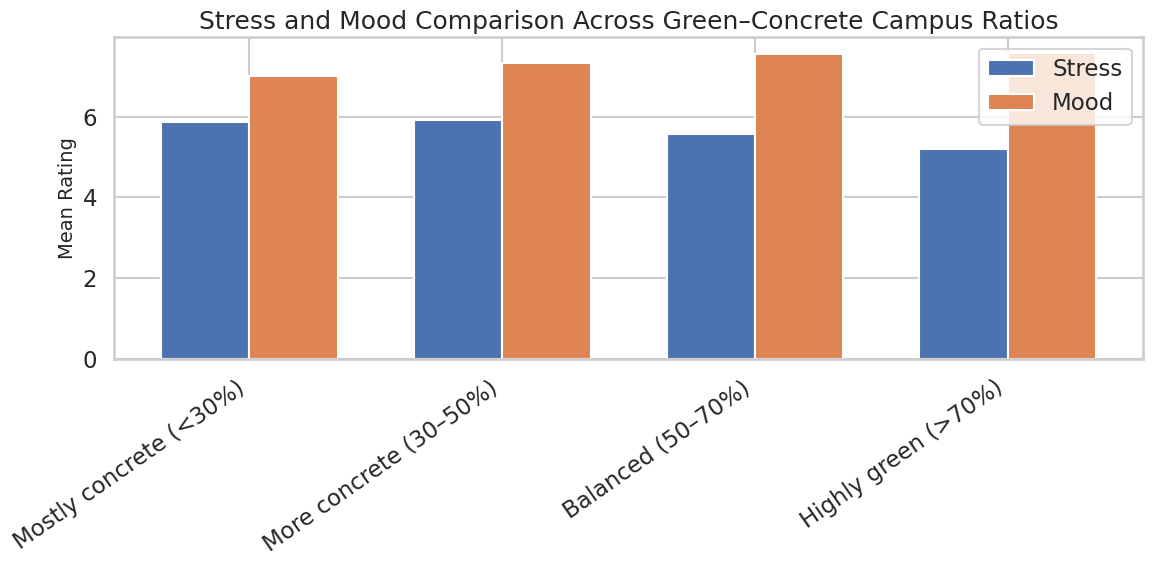

In [ ]:
# ======================================================
# Green vs Concrete Ratio – FINAL CORRECT VERSION
# Based EXACTLY on your real survey options (4 levels)
# ======================================================

ratio_col = "How would you rate the current ratio of green to concrete spaces on campus?"

# # ------------------------------------------------------
# # EXACT mapping from your screenshot
# # ------------------------------------------------------
# ratio_mapping = {
#     "Mostly concrete (less than 30%)": 1,
#     "More concrete than green (30–50%)": 2,
#     "Balanced (50–70% green cover)": 3,
#     "Highly green (more than 70% green cover)": 4
# }

# # Map
# df["_green_ratio_num"] = df[ratio_col].map(ratio_mapping)

# ------------------------------------------------------
# CLEAN + FUZZY MATCH MAPPING (never breaks)
# ------------------------------------------------------

df["_ratio_clean"] = (
    df[ratio_col]
      .astype(str)
      .str.lower()
      .str.strip()
)

def map_ratio(text):
    if "mostly concrete" in text:
        return 1
    elif "more concrete" in text:
        return 2
    elif "balanced" in text:
        return 3
    elif "highly green" in text:
        return 4
    else:
        return np.nan

df["_green_ratio_num"] = df["_ratio_clean"].apply(map_ratio)


# ------------------------------------------------------
# Group means
# ------------------------------------------------------
grouped = (
    df.groupby("_green_ratio_num")
      .agg({
          stress_col: "mean",
          mood_col: "mean"
      })
)

# ------------------------------------------------------
# Force ALL 4 categories to appear
# ------------------------------------------------------
full_index = pd.Index([1,2,3,4], name="_green_ratio_num")
grouped = grouped.reindex(full_index)

labels = [
    "Mostly concrete (<30%)",
    "More concrete (30–50%)",
    "Balanced (50–70%)",
    "Highly green (>70%)"
]

# ------------------------------------------------------
# Plot grouped comparison bars
# ------------------------------------------------------
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12,6))

plt.bar(x - width/2, grouped[stress_col], width, label="Stress")
plt.bar(x + width/2, grouped[mood_col], width, label="Mood")

plt.xticks(x, labels, rotation=35, ha='right')

plt.ylabel("Mean Rating")
plt.title("Stress and Mood Comparison Across Green–Concrete Campus Ratios")
plt.legend()

plt.tight_layout()
plt.show()


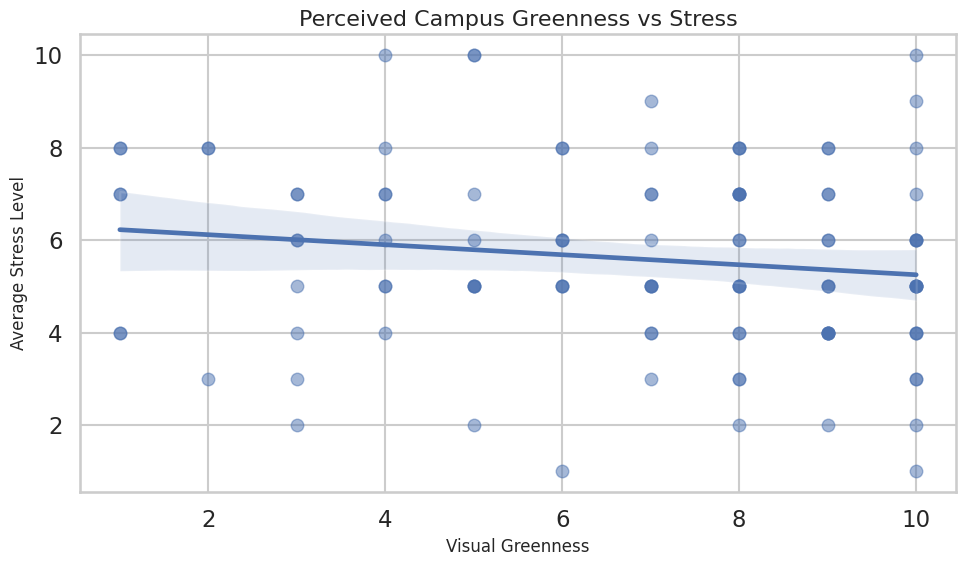

In [ ]:
perception_cols = [
    "How visually green do you consider your campus?",
    "How would you rate the maintenance of greenery around your frequent spaces?",
    "How would you rate the current ratio of green to concrete spaces on campus?",
    "What does your overall mood or well-being primarily depend on most of the time?"
]

# Short labels for perception boxplot
short_perception_labels = {
    "How visually green do you consider your campus?": "Visual Greenness",
    "How would you rate the maintenance of greenery around your frequent spaces?": "Greenery Maintenance",
    "How would you rate the current ratio of green to concrete spaces on campus?": "Green to Concrete Ratio"
}

# Short labels for regplots
short_regplot_x_label = "Visual Greenness"
short_regplot_y_label = "Average Stress Level"

fig, axes = plt.subplots(1, 1, figsize=(10, 6)) # Adjust figsize for a single plot

# Plot 2: Perceived Campus Greenness vs Stress (Regplot - first instance)
sns.regplot(
    data=final_df,
    x="How visually green do you consider your campus?",
    y="How would you describe your average stress level?",
    scatter_kws={"alpha":0.5},
    ax=axes
)
axes.set_title("Perceived Campus Greenness vs Stress", fontsize=16)
axes.set_xlabel(short_regplot_x_label, fontsize=12)
axes.set_ylabel(short_regplot_y_label, fontsize=12)

plt.tight_layout()
plt.show()

#### Comparision of stress in different campus areas

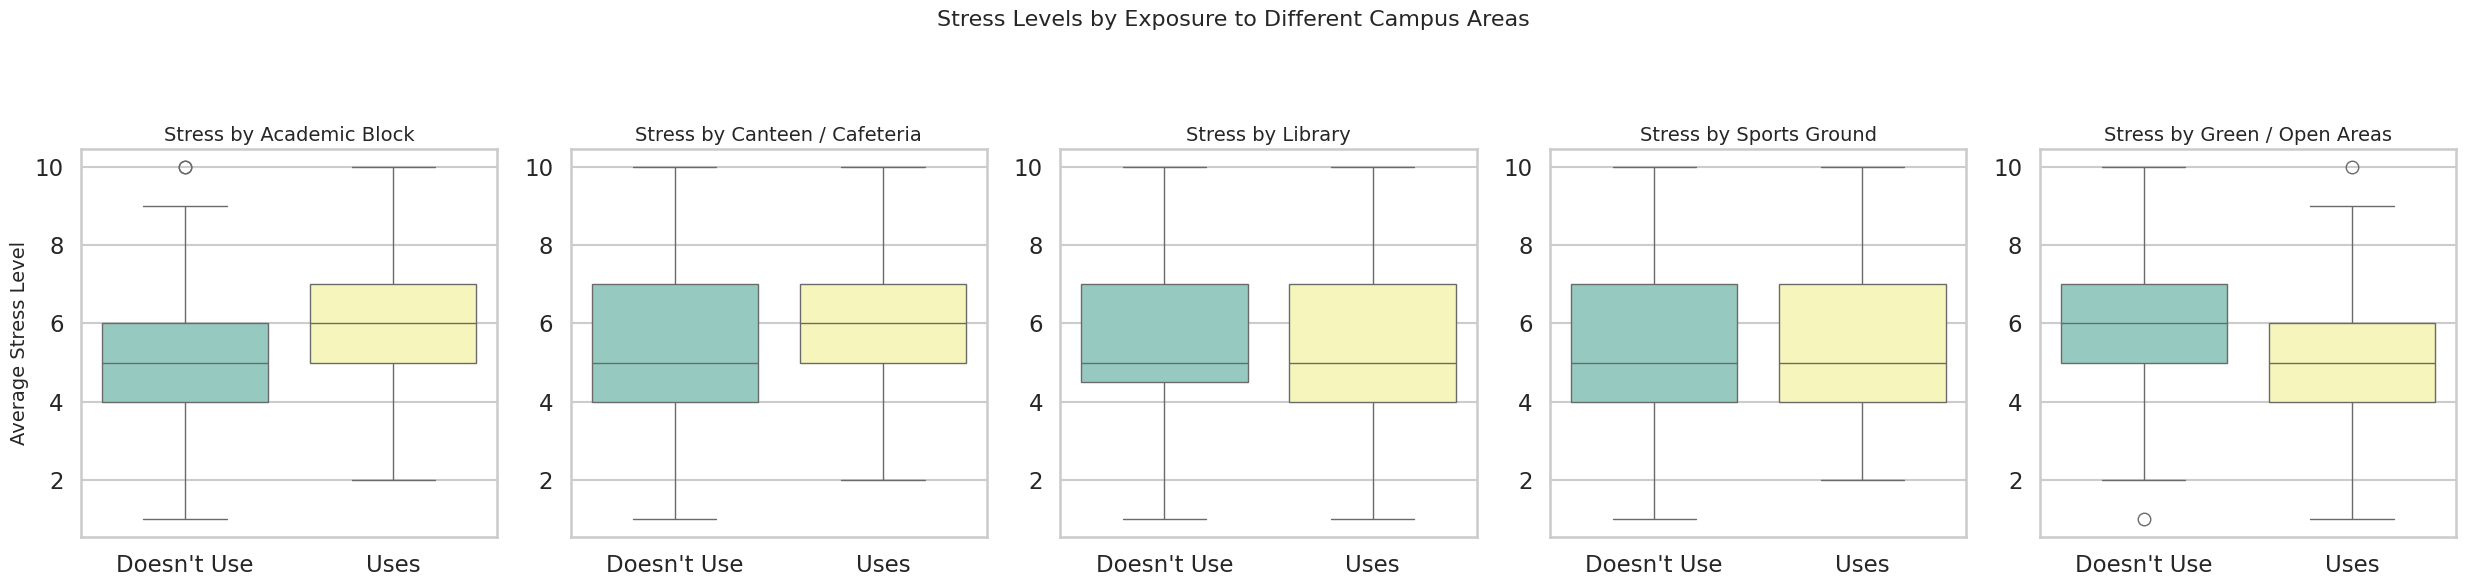

In [ ]:
area_keywords = {
    "Academic Block": ["academic"],
    "Canteen / Cafeteria": ["canteen", "cafeteria"],
    "Library": ["library"],
    "Sports Ground": ["sports", "ground"],
    "Green / Open Areas": ["garden", "green", "park"]
}

# Create binary exposure columns for each area if they don't already exist
for area, keywords in area_keywords.items():
    if area not in final_df.columns:
        final_df[area] = final_df[
            "Which campus areas do you most frequently spend time in?"
        ].str.lower().str.contains(
            "|".join(keywords),
            regex=True,
            na=False
        ).astype(int)

# Prepare figure and axes for 5 subplots
fig, axes = plt.subplots(1, len(area_keywords), figsize=(5 * len(area_keywords), 6))

# Ensure axes is an array even for a single subplot
if len(area_keywords) == 1:
    axes = [axes]

for i, (area, _) in enumerate(area_keywords.items()):
    sns.boxplot(
        data=final_df,
        x=area,
        y="How would you describe your average stress level?",
        palette="Set3",
        ax=axes[i]
    )
    axes[i].set_xticks([0, 1], ["Doesn't Use", "Uses"]) # Set custom x-tick labels
    axes[i].set_title(f"Stress by {area}", fontsize=14)
    axes[i].set_xlabel("") # Remove x-label as custom ticks are descriptive
    axes[i].set_ylabel("Average Stress Level" if i == 0 else "") # Only show y-label on first plot

plt.suptitle("Stress Levels by Exposure to Different Campus Areas", fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to make space for suptitle
plt.show()

#### Analysis based on college aggregations

In [ ]:
# -------------------------
# Per-college aggregations used across analyses
# -------------------------
agg_map = {}
if mood_col:
    agg_map[mood_col] = "mean"
if stress_col:
    agg_map[stress_col] = "mean"
agg_map["_focus_improved"] = "mean" # Add focus improved for later use

# Add geospatial/urban context columns
if "_ndvi" in df.columns:
    agg_map["_ndvi"] = "mean"
if "population_density_per_km2" in df.columns:
    agg_map["population_density_per_km2"] = "mean"
if "night_light_intensity" in df.columns:
    agg_map["night_light_intensity"] = "mean"
if "built_area_km2" in df.columns:
    agg_map["built_area_km2"] = "mean"

college_stats = df.groupby(college_col).agg(agg_map).reset_index()

# rename nicely
rename_map = {}
# Ensure the college column is renamed to 'College'
if college_col != "College":
    rename_map[college_col] = "College"
rename_map[mood_col] = "Mood"
rename_map[stress_col] = "Stress"
rename_map["_focus_improved"] = "Focus_Improvement_Pct"

# Rename geospatial columns if they were aggregated
if "_ndvi" in df.columns:
    rename_map["_ndvi"] = "NDVI_mean"
if "population_density_per_km2" in df.columns:
    rename_map["population_density_per_km2"] = "Pop_Density_mean"
if "night_light_intensity" in df.columns:
    rename_map["night_light_intensity"] = "Nightlight_mean"
if "built_area_km2" in df.columns:
    rename_map["built_area_km2"] = "BuiltArea_mean"

college_stats = college_stats.rename(columns=rename_map)
# convert Focus_Improvement_Pct to %
if "Focus_Improvement_Pct" in college_stats.columns:
    college_stats["Focus_Improvement_Pct"] = college_stats["Focus_Improvement_Pct"] * 100

##### Stress, Mood and Focus across different colleges

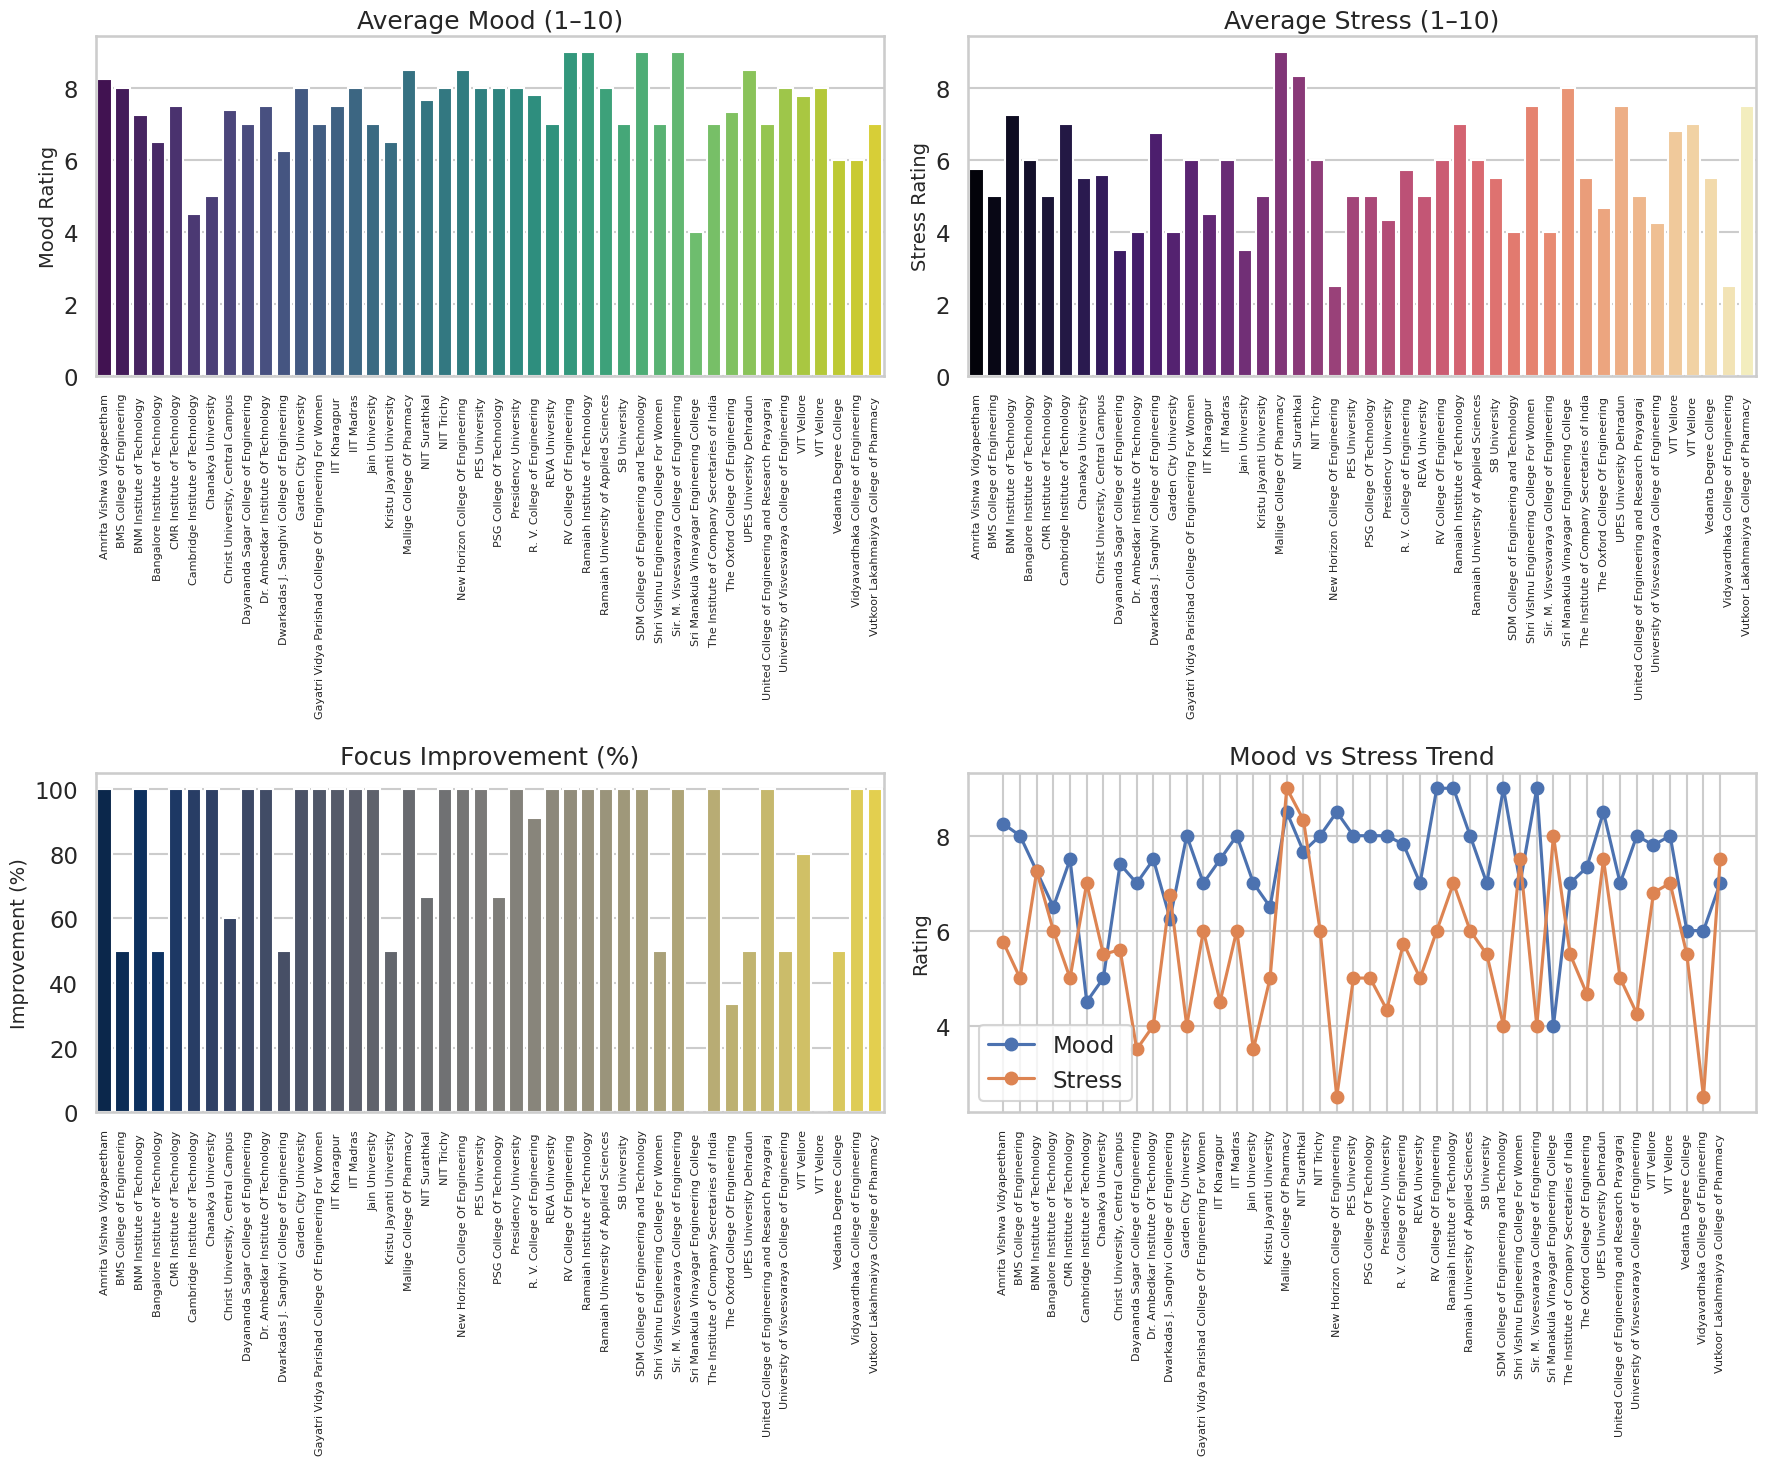

In [ ]:
mood_col = "How would you rate your overall mood generally on a scale from 1 to 10"
stress_col = "How would you describe your average stress level?"
focus_col = "How does your concentration/focus change in green over non-green areas?"

# Ensure college_stats from P0O-xL3lowbL is used and only merge focus_stats

# ======================================================
# FOCUS – PERCENTAGE IMPROVEMENT PER COLLEGE
# ======================================================
# Count only improvement categories
focus_categories = [
    "Improves slightly",
    "Improves significantly"
]

focus_stats = (
    final_df.assign(improved=final_df[focus_col].isin(focus_categories))
      .groupby(college_col)["improved"]
      .mean() * 100
)

focus_stats = focus_stats.reset_index()
focus_stats.columns = ["College", "Focus_Improvement_Pct"] # Ensure consistent name

# ======================================================
# MERGE Focus_Improvement_Pct into the existing college_stats
# ======================================================
# Merge only if 'Focus_Improvement_Pct' isn't already in college_stats from P0O-xL3lowbL
# (It should be, but this guards against re-merging)
if "Focus_Improvement_Pct" not in college_stats.columns:
    college_stats = college_stats.merge(focus_stats, on="College")
else:
    # If it is already there, update it or ensure it's correct
    college_stats = college_stats.drop(columns=["Focus_Improvement_Pct"]).merge(focus_stats, on="College")


# ======================================================
# OPTIONAL: WELLBEING INDEX
# ======================================================
college_stats["Wellbeing_Index"] = (
      (college_stats["Mood"]/10) * 0.4
    + ((10 - college_stats["Stress"])/10) * 0.4
    + (college_stats["Focus_Improvement_Pct"]/100) * 0.2
)


# ======================================================
# ---------------- GRAPH GENERATION --------------------
# (These lines generate graphs when run)
# ======================================================


# ------------------------------------------------------
# ROW 1 → Mood | Stress | Focus% | Mood vs Stress
# ------------------------------------------------------

fig, ax = plt.subplots(2, 2, figsize=(18, 15)) # 2 rows, 2 columns

# Mood
sns.barplot(x=college_stats["College"], y=college_stats["Mood"], ax=ax[0, 0], palette="viridis")
ax[0, 0].set_title("Average Mood (1–10)")
ax[0, 0].tick_params(axis='x', rotation=90, labelsize=8)
ax[0, 0].set_xlabel("")
ax[0, 0].set_ylabel("Mood Rating")

# Stress
sns.barplot(x=college_stats["College"], y=college_stats["Stress"], ax=ax[0, 1], palette="magma")
ax[0, 1].set_title("Average Stress (1–10)")
ax[0, 1].tick_params(axis='x', rotation=90, labelsize=8)
ax[0, 1].set_xlabel("")
ax[0, 1].set_ylabel("Stress Rating")

# Focus improvement %
sns.barplot(x=college_stats["College"], y=college_stats["Focus_Improvement_Pct"], ax=ax[1, 0], palette="cividis")
ax[1, 0].set_title("Focus Improvement (%)")
ax[1, 0].tick_params(axis='x', rotation=90, labelsize=8)
ax[1, 0].set_xlabel("")
ax[1, 0].set_ylabel("Improvement (%)")

# Mood vs Stress line
ax[1, 1].plot(college_stats["College"], college_stats["Mood"], marker='o', label="Mood")
ax[1, 1].plot(college_stats["College"], college_stats["Stress"], marker='o', label="Stress")
ax[1, 1].legend(loc='best')
ax[1, 1].set_title("Mood vs Stress Trend")
ax[1, 1].tick_params(axis='x', rotation=90, labelsize=8)
ax[1, 1].set_xlabel("")
ax[1, 1].set_ylabel("Rating")

plt.tight_layout()
plt.show()

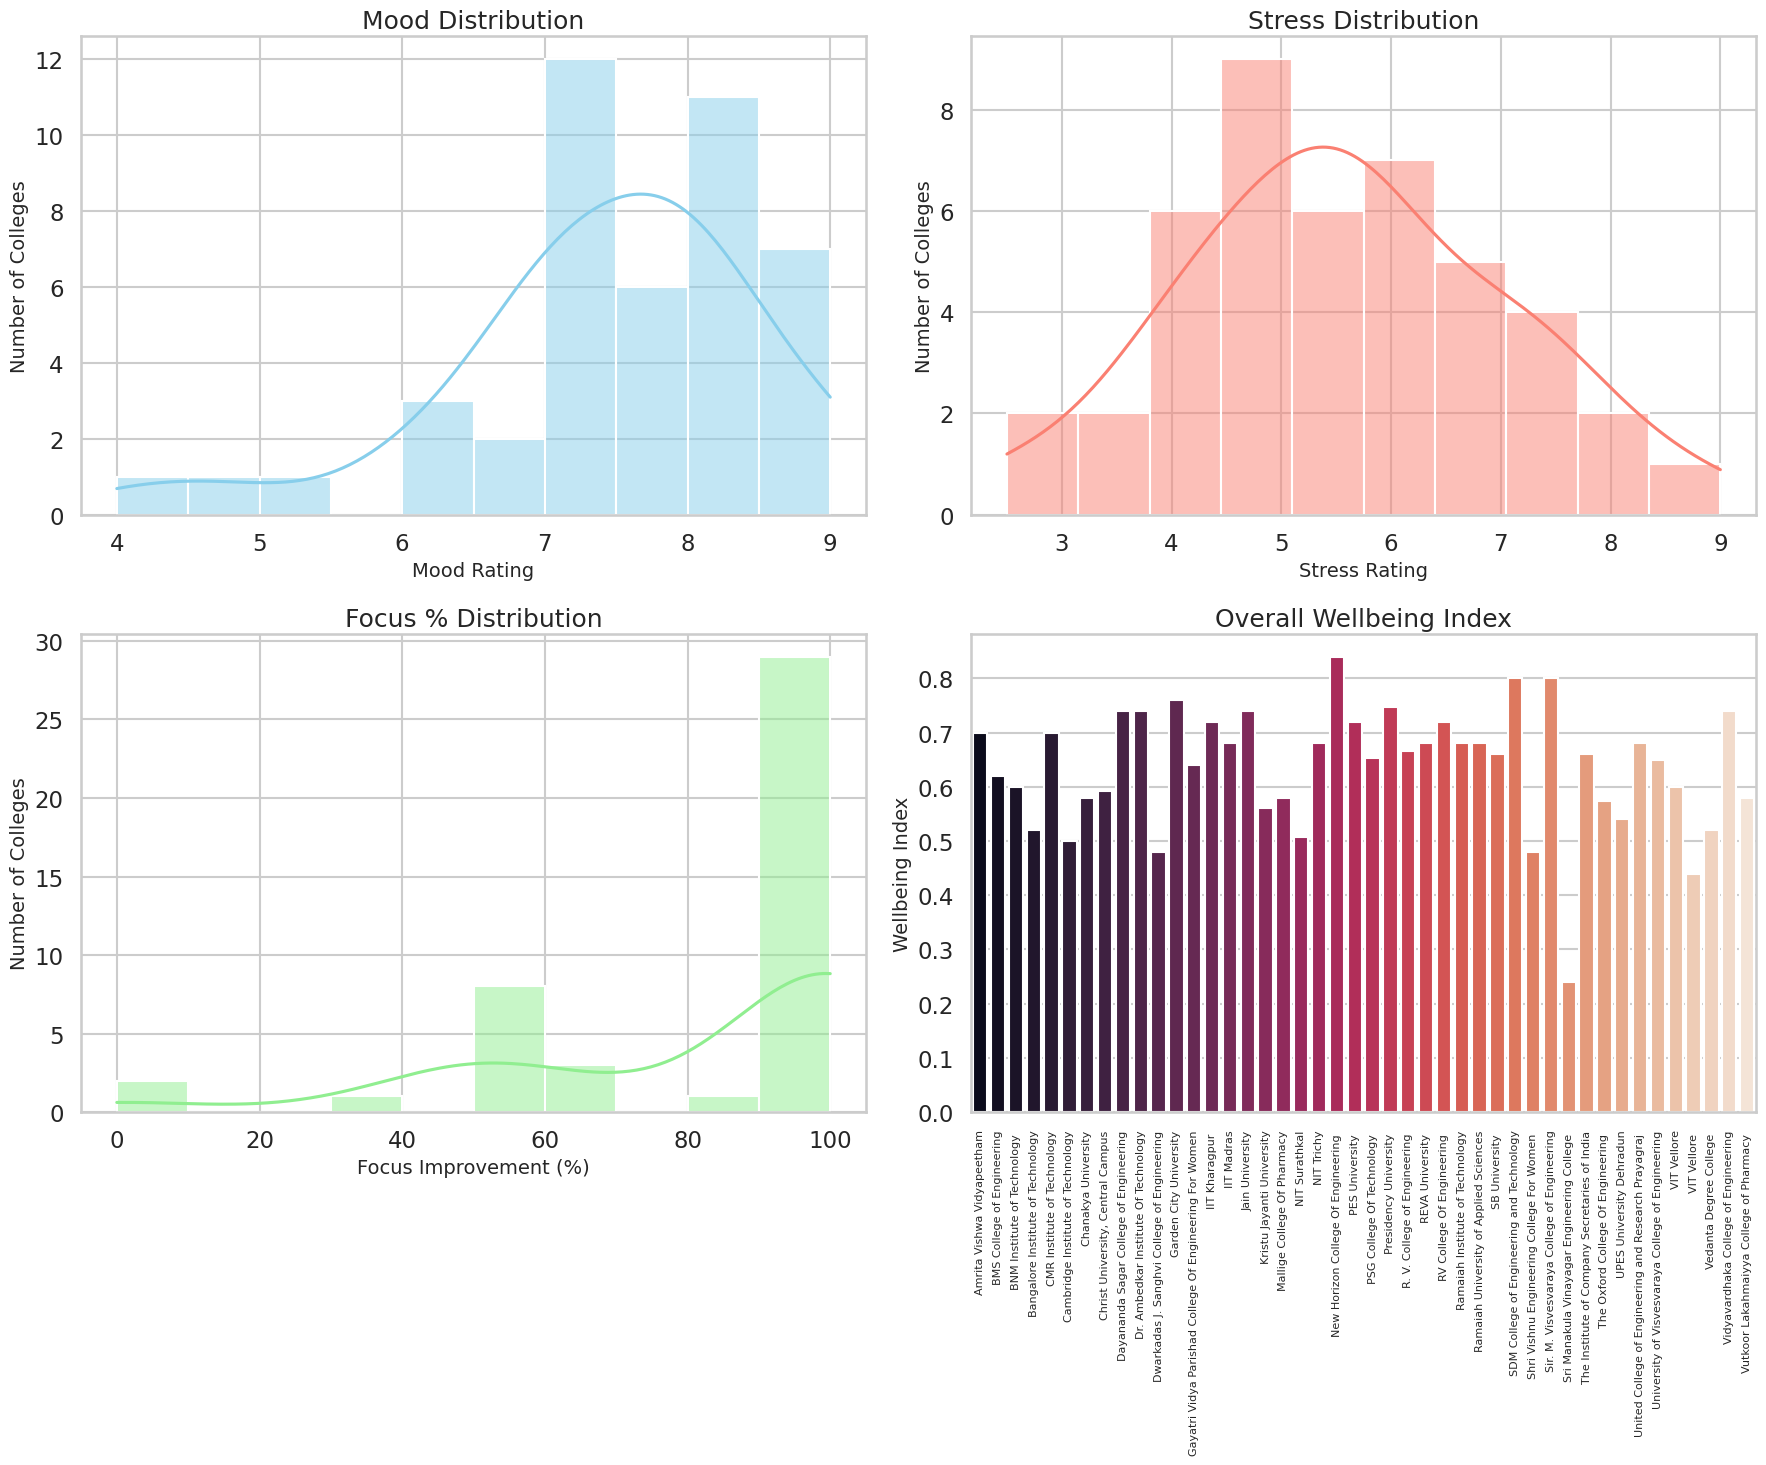

In [ ]:
# ------------------------------------------------------
# ROW 2 → Histograms + Wellbeing
# ------------------------------------------------------

# Ensure Wellbeing_Index is present in college_stats
# This calculation is typically done in cell `w1i7nEvjwRok`
# Re-calculating it here to ensure it's available.
college_stats["Wellbeing_Index"] = (
      (college_stats["Mood"]/10) * 0.4
    + ((10 - college_stats["Stress"])/10) * 0.4
    + (college_stats["Focus_Improvement_Pct"]/100) * 0.2
)

fig, ax = plt.subplots(2, 2, figsize=(18, 15)) # 2 rows, 2 columns

# Mood Distribution
sns.histplot(college_stats["Mood"], bins=10, kde=True, ax=ax[0, 0], color="skyblue")
ax[0, 0].set_title("Mood Distribution")
ax[0, 0].set_xlabel("Mood Rating")
ax[0, 0].set_ylabel("Number of Colleges")

# Stress Distribution
sns.histplot(college_stats["Stress"], bins=10, kde=True, ax=ax[0, 1], color="salmon")
ax[0, 1].set_title("Stress Distribution")
ax[0, 1].set_xlabel("Stress Rating")
ax[0, 1].set_ylabel("Number of Colleges")

# Focus % Distribution
sns.histplot(college_stats["Focus_Improvement_Pct"], bins=10, kde=True, ax=ax[1, 0], color="lightgreen")
ax[1, 0].set_title("Focus % Distribution")
ax[1, 0].set_xlabel("Focus Improvement (%)")
ax[1, 0].set_ylabel("Number of Colleges")

# Overall Wellbeing Index
sns.barplot(x=college_stats["College"], y=college_stats["Wellbeing_Index"], ax=ax[1, 1], palette="rocket")
ax[1, 1].set_title("Overall Wellbeing Index")
ax[1, 1].tick_params(axis='x', rotation=90, labelsize=8)
ax[1, 1].set_xlabel("")
ax[1, 1].set_ylabel("Wellbeing Index")

plt.tight_layout()
plt.show()

##### Green Campus Vs. Less to No green Campus

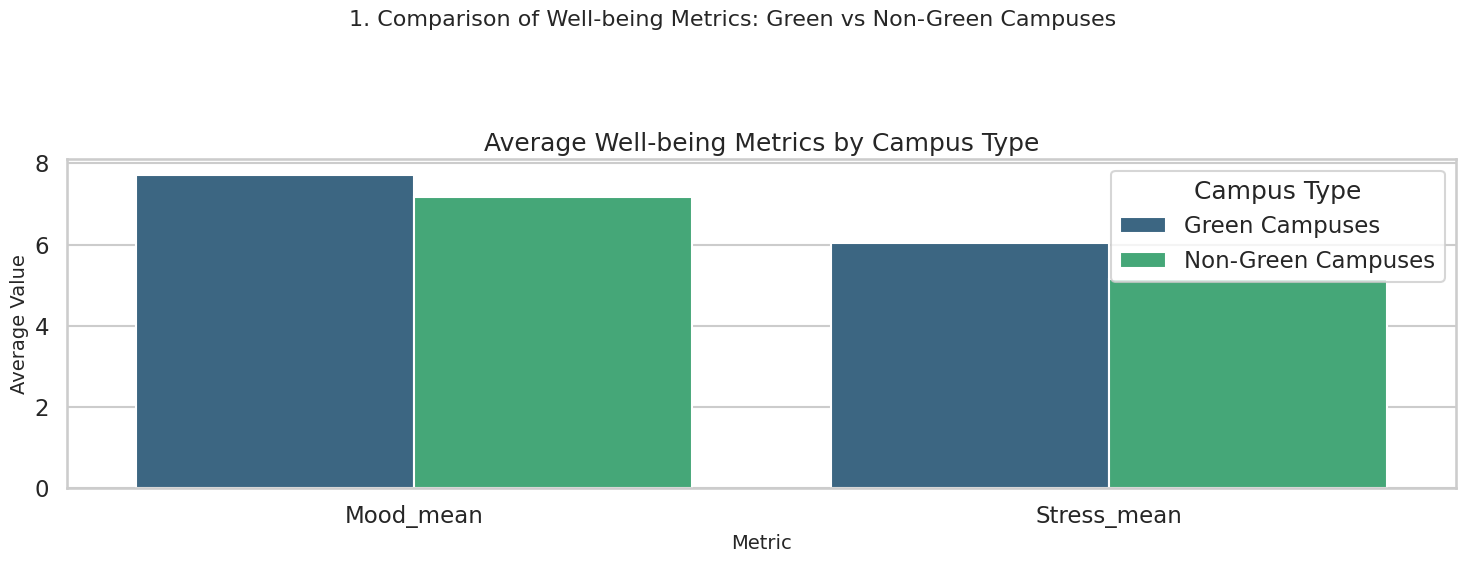

In [ ]:
# -------------------------
# 1) Comparison of stress & mood of colleges WITH vs WITHOUT greenery
# -------------------------
# We'll compare college-wise averages for "green campuses" vs "non-green campuses".
green_group = df[df["_is_green_campus"] == True]
nongreen_group = df[df["_is_green_campus"] == False]

# Per-college average already computed; alternatively compute overall means for each college-group
def group_stats(group_df):
    res = {}
    if mood_col: res["Mood_mean"] = group_df[mood_col].mean()
    if stress_col: res["Stress_mean"] = group_df[stress_col].mean()
    # if "_focus_improved" in group_df.columns: res["Focus_Improve_mean_pct"] = group_df["_focus_improved"].mean() * 100
    return res

green_stats = group_stats(green_group)
nongreen_stats = group_stats(nongreen_group)

# Create dataframe for plotting
cmp_data = {
    "Category": ["Green Campuses", "Non-Green Campuses"],
    "Mood_mean": [green_stats.get("Mood_mean", np.nan), nongreen_stats.get("Mood_mean", np.nan)],
    "Stress_mean": [green_stats.get("Stress_mean", np.nan), nongreen_stats.get("Stress_mean", np.nan)],
    # "Focus_Improve_mean_pct": [green_stats.get("Focus_Improve_mean_pct", np.nan), nongreen_stats.get("Focus_Improve_mean_pct", np.nan)]
}
cmp_df_plot = pd.DataFrame(cmp_data).set_index("Category").stack().reset_index()
cmp_df_plot.columns = ["Campus Type", "Metric", "Value"]

# Plotting for Section 1
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
fig.suptitle("1. Comparison of Well-being Metrics: Green vs Non-Green Campuses", fontsize=16)

# Grouped Bar Chart
sns.barplot(data=cmp_df_plot, x="Metric", y="Value", hue="Campus Type", palette="viridis", ax=ax)
ax.set_title("Average Well-being Metrics by Campus Type")
ax.set_ylabel("Average Value")
ax.set_xlabel("Metric")
ax.tick_params(axis='x', rotation=0)
ax.legend(title="Campus Type")

# Overall focus pie chart (removed as only one subplot is created)
# focus_dist = df["_focus_low"].value_counts()
# ax.pie(focus_dist, labels=focus_dist.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
# ax.set_title("Overall Focus Change Distribution")
# ax.axis('equal')

plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()

##### Stress and mood variations in Green areas

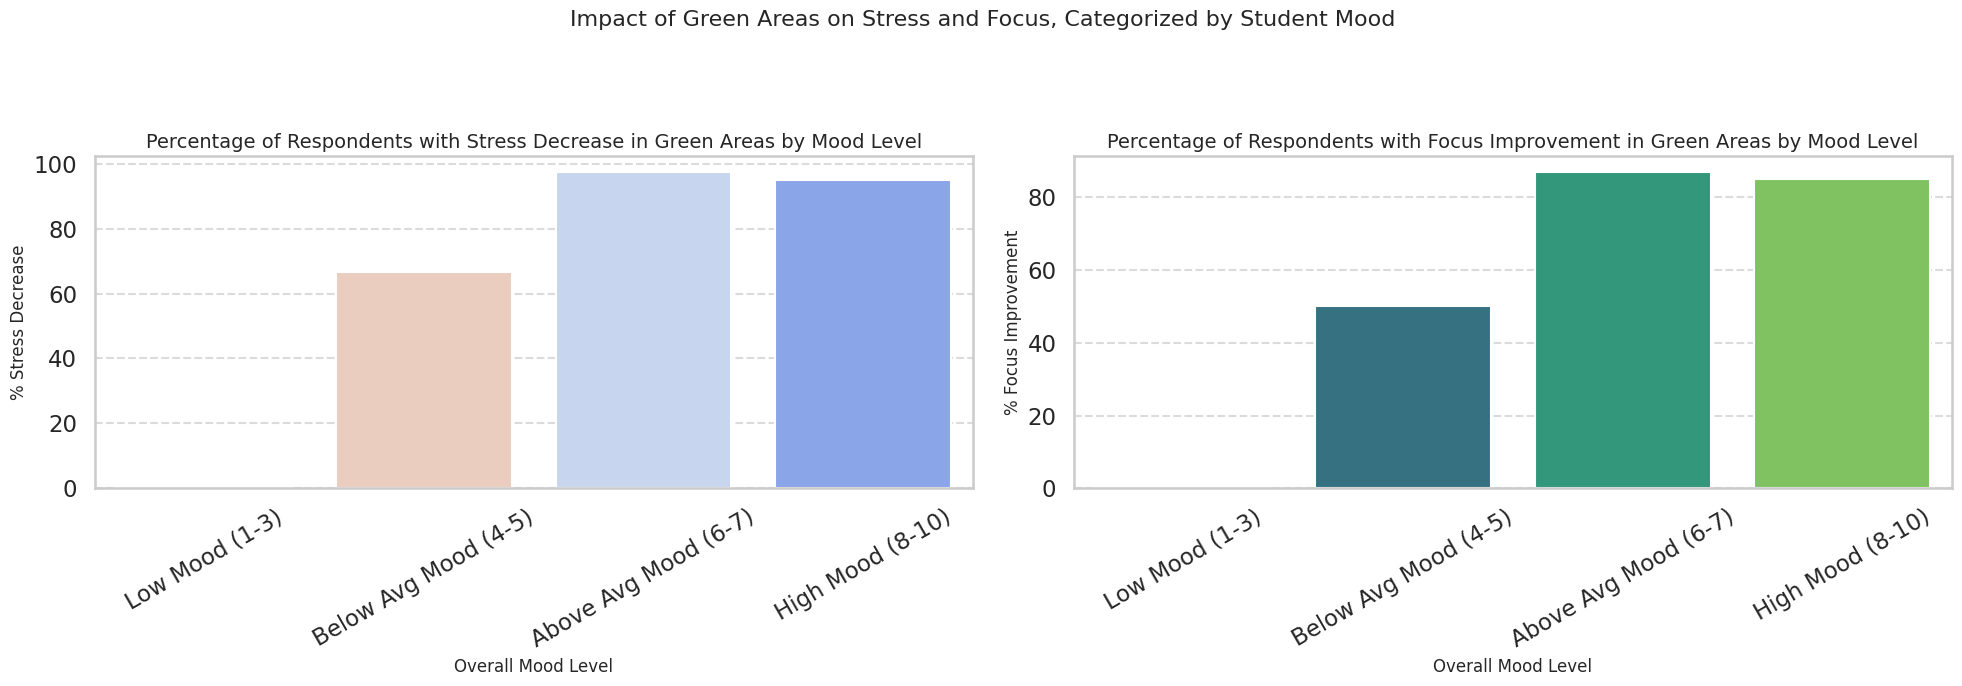

In [ ]:
# ======================================================
# 2) Mood vs Stress/Focus/Stress-change analysis
# (BASED ONLY ON REAL SURVEY QUESTIONS)
# ======================================================

stress_change_col = "When you spend time in green areas, how does your stress level change?"

# ------------------------------------------------------
# Encode improvements correctly
# ------------------------------------------------------

stress_decrease_vals = ["Decreases a lot", "Decreases moderately"]
focus_improve_vals = ["Improves slightly", "Improves significantly"]

df["_stress_decreased"] = df[stress_change_col].isin(stress_decrease_vals)
df["_focus_improved"] = df[focus_col].isin(focus_improve_vals)

# ------------------------------------------------------
# Mood bins (1–10 scale)
# ------------------------------------------------------

df["_mood_cat"] = pd.cut(
    df[mood_col],
    bins=[0,3,5,7,10],
    labels=["Low Mood (1-3)", "Below Avg Mood (4-5)", "Above Avg Mood (6-7)", "High Mood (8-10)"] # More descriptive labels
)

# ------------------------------------------------------
# Group stats
# ------------------------------------------------------

mood_group = (
    df.groupby("_mood_cat")
      .agg({
          stress_col: "mean",
          "_stress_decreased": "mean",
          "_focus_improved": "mean"
      })
      .reset_index()
)

mood_group["_stress_decreased"] *= 100
mood_group["_focus_improved"] *= 100

# ------------------------------------------------------
# Plot (3 meaningful graphs)
# ------------------------------------------------------

fig, axes = plt.subplots(1, 2, figsize=(20, 7)) # Slightly larger figure for better detail

# % stress decrease in green
sns.barplot(
    x="_mood_cat",
    y="_stress_decreased",
    data=mood_group,
    ax=axes[0],
    palette="coolwarm_r" # Reversed coolwarm for better visual of decrease
)
axes[0].set_title("Percentage of Respondents with Stress Decrease in Green Areas by Mood Level", fontsize=14)
axes[0].set_xlabel("Overall Mood Level", fontsize=12)
axes[0].set_ylabel("% Stress Decrease", fontsize=12)
axes[0].tick_params(axis='x', rotation=30) # Rotate x-labels for readability
axes[0].grid(axis='y', linestyle='--', alpha=0.7) # Add grid for better comparison

# % focus improvement
sns.barplot(
    x="_mood_cat",
    y="_focus_improved",
    data=mood_group,
    ax=axes[1],
    palette="viridis" # Viridis palette for improvement
)
axes[1].set_title("Percentage of Respondents with Focus Improvement in Green Areas by Mood Level", fontsize=14)
axes[1].set_xlabel("Overall Mood Level", fontsize=12)
axes[1].set_ylabel("% Focus Improvement", fontsize=12)
axes[1].tick_params(axis='x', rotation=30) # Rotate x-labels for readability
axes[1].grid(axis='y', linestyle='--', alpha=0.7) # Add grid for better comparison

plt.suptitle("Impact of Green Areas on Stress and Focus, Categorized by Student Mood", fontsize=16, y=1.02) # Overall title
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to make space for suptitle
plt.show()

##### Socio Urban Features Vs Stress and Mood

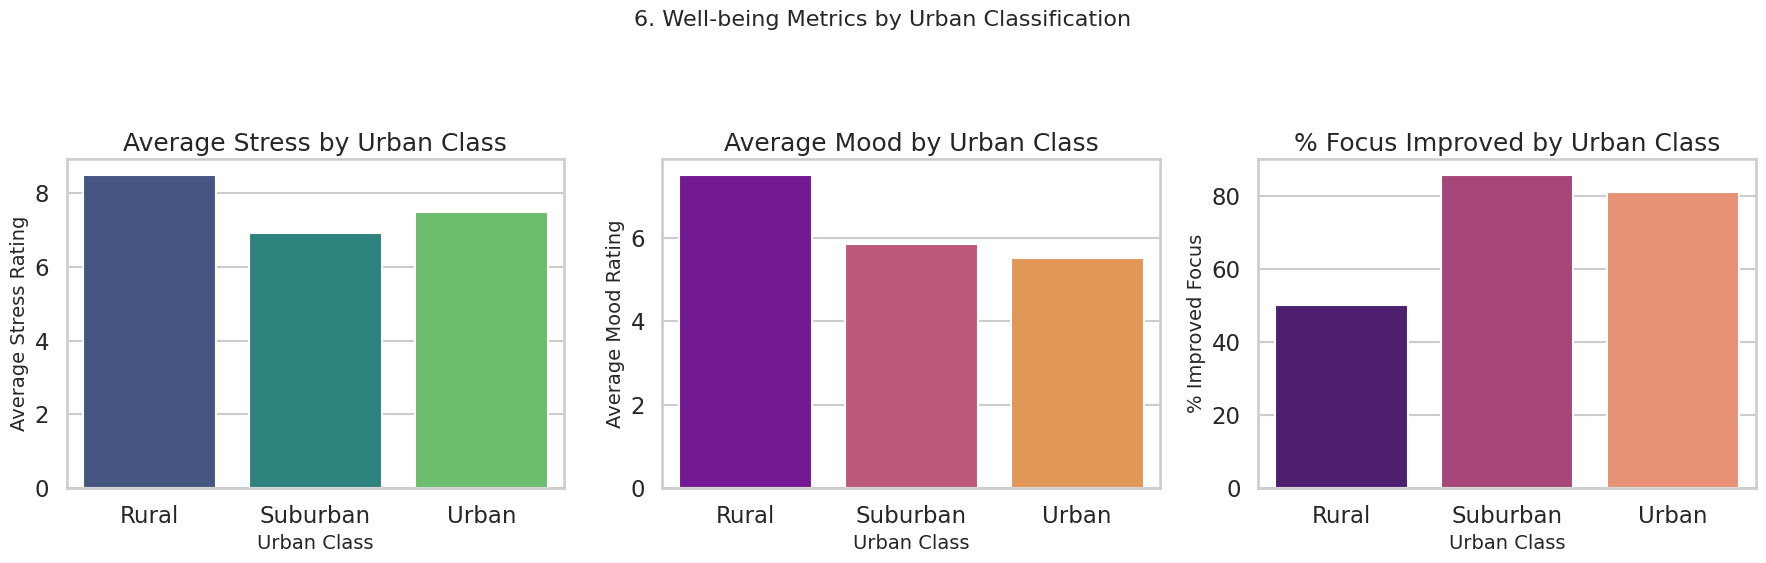

In [ ]:
# -------------------------
# 6) Urban vs Suburban vs Rural comparisons
# -------------------------
if urban_col_use and urban_col_use in df.columns:
    # use urban_col_use values at respondent-level then aggregate
    groupkey = urban_col_use

    # Only define order if urban_col_use is a categorical column derived from population density
    if groupkey == "_urban_class" or groupkey == "_urban_degree_label": # Added _urban_degree_label here
        order = ["Rural", "Suburban", "Urban"]
    else:
        # For numerical columns like degree_of_urbanization, let seaborn sort or use the column's natural order
        order = None

    urb_stats = df.groupby(groupkey).agg({
        mood_col: "mean" if mood_col else lambda s: np.nan,
        stress_col: "mean" if stress_col else lambda s: np.nan,
        "_focus_improved": "mean"
    }).reset_index().rename(columns={mood_col:"Mood", stress_col:"Stress", "_focus_improved":"Focus_Improve_Rate"})

    if "Focus_Improve_Rate" in urb_stats.columns:
        urb_stats["Focus_Improve_Rate"] = urb_stats["Focus_Improve_Rate"] * 100

    # Plotting for Section 6
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle("6. Well-being Metrics by Urban Classification", fontsize=16)

    # Avg Mood by Urban Class
    if "Mood" in urb_stats.columns:
        sns.barplot(x=urb_stats[groupkey].astype(str), y=urb_stats["Mood"], palette="viridis", ax=axes[0], order=order)
        axes[0].set_title("Average Stress by Urban Class")
        axes[0].set_ylabel("Average Stress Rating")
        axes[0].set_xlabel("Urban Class")
    else:
        axes[0].axis('off')

    # Avg Stress by Urban Class
    if "Stress" in urb_stats.columns:
        sns.barplot(x=urb_stats[groupkey].astype(str), y=urb_stats["Stress"], palette="plasma", ax=axes[1],order=order)
        axes[1].set_title("Average Mood by Urban Class")
        axes[1].set_ylabel("Average Mood Rating")
        axes[1].set_xlabel("Urban Class")
    else:
        axes[1].axis('off')

    # % Focus Improved by Urban Class
    if "Focus_Improve_Rate" in urb_stats.columns:
        sns.barplot(x=urb_stats[groupkey].astype(str), y=urb_stats["Focus_Improve_Rate"], palette="magma", ax=axes[2],order=order)
        axes[2].set_title("% Focus Improved by Urban Class")
        axes[2].set_ylabel("% Improved Focus")
        axes[2].set_xlabel("Urban Class")
    else:
        axes[2].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.9])
    plt.show()
else:
    print("No urban classification available; skipping urban/suburban/rural comparison.")

# -------------------------
# Optionally save college_stats to CSV for downstream analysis
# -------------------------
# college_stats.to_csv("college_stats_summary.csv", index=False)
# print("Saved college_stats_summary.csv")

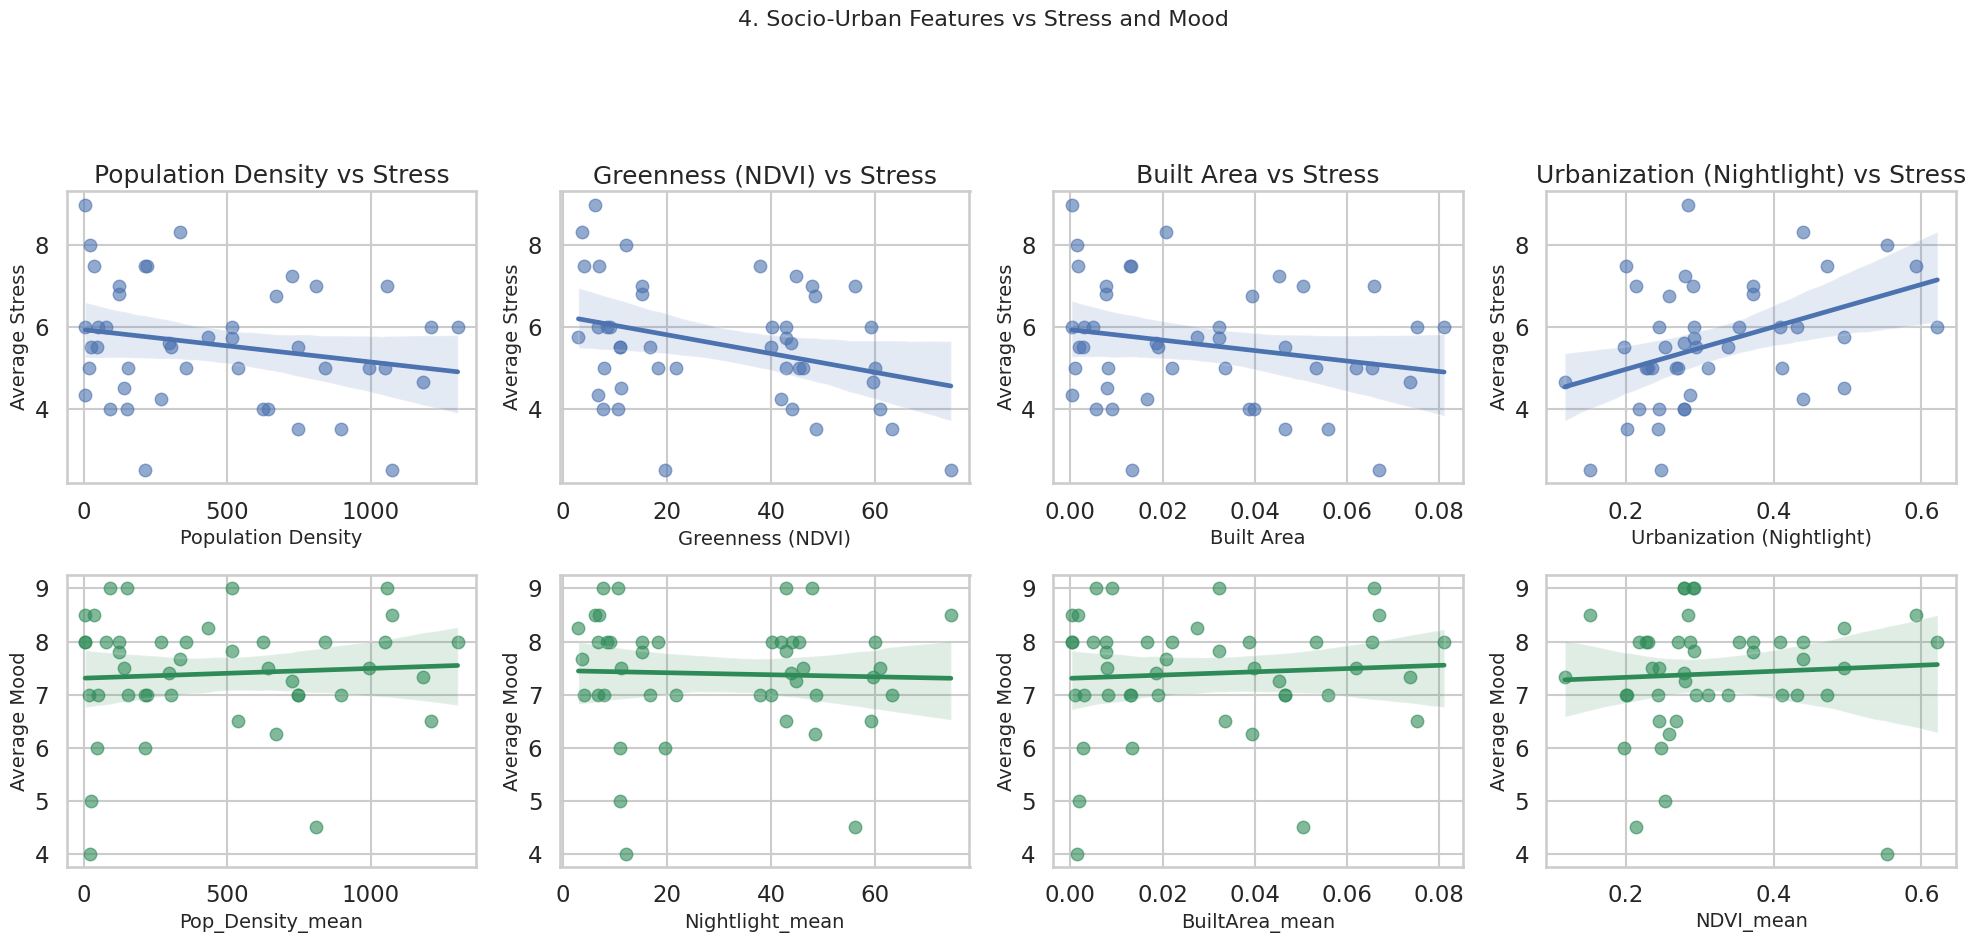

In [ ]:
# -------------------------
# 4) How urbanish campuses impact mental health:
#    socio-urban features vs stress/focus/mood
# -------------------------
# We will look at population density, nightlight intensity, and degree_of_urbanization (if available)
# Per-college aggregated values are used for cleaner comparisons
# Use college_stats which contains NDVI_mean, Mood, Stress etc if available
cols_for_corr = []
if "Pop_Density_mean" in college_stats.columns: cols_for_corr.append("Pop_Density_mean")
if "Nightlight_mean" in college_stats.columns: cols_for_corr.append("Nightlight_mean")
if "BuiltArea_mean" in college_stats.columns: cols_for_corr.append("BuiltArea_mean")
if "NDVI_mean" in college_stats.columns: cols_for_corr.append("NDVI_mean")

# Plotting for Section 4: Use regplot for relationships
if len(cols_for_corr) > 0 and (("Stress" in college_stats.columns and "Mood" in college_stats.columns) or ("Stress" in college_stats.columns or "Mood" in college_stats.columns)):
    num_features = len(cols_for_corr)
    num_rows = 2 # For Stress and Mood
    num_cols = min(num_features, 4) # Limit columns to prevent overly wide figures

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))
    fig.suptitle("4. Socio-Urban Features vs Stress and Mood", fontsize=16)

    # Flatten axes if only one row or column for easier iteration
    if num_rows == 1 and num_cols == 1: axes = np.array([[axes]])
    elif num_rows == 1: axes = axes[np.newaxis, :]
    elif num_cols == 1: axes = axes[:, np.newaxis]

    for i, feature in enumerate(cols_for_corr):
        if i >= num_cols: break # Ensure we don't go beyond allocated subplots per row

        if "nightlight" in feature.lower():
            display_name = "Greenness (NDVI)"

        elif "ndvi" in feature.lower():
            display_name = "Urbanization (Nightlight)"

        elif "pop" in feature.lower():
            display_name = "Population Density"

        elif "built" in feature.lower():
            display_name = "Built Area"

        else:
            display_name = feature.replace("_mean", "")

        # Plot vs Stress
        if "Stress" in college_stats.columns:
            sns.regplot(x=feature, y="Stress", data=college_stats, ax=axes[0, i], scatter_kws={'alpha':0.6})
            # axes[0, i].set_title(f"{feature.replace('_mean', '')} vs Stress")
            # axes[0, i].set_xlabel(feature.replace('_mean', ''))
            axes[0, i].set_title(f"{display_name} vs Stress")
            axes[0, i].set_xlabel(display_name)
            axes[0, i].set_ylabel("Average Stress")
        else:
            axes[0, i].axis('off') # Hide if no Stress column

        # Plot vs Mood
        if "Mood" in college_stats.columns:
            sns.regplot(x=feature, y="Mood", data=college_stats, ax=axes[1, i], color="seagreen", scatter_kws={'alpha':0.6})
            # axes[1, i].set_title(f"{feature.replace('_mean', '')} vs Mood")
            # axes[1, i].set_xlabel(feature.replace('_mean', ''))
            axes[0, i].set_title(f"{display_name} vs Stress")
            axes[0, i].set_xlabel(display_name)
            axes[1, i].set_ylabel("Average Mood")
        else:
            axes[1, i].axis('off') # Hide if no Mood column

    # Remove any unused subplots
    for i in range(num_features, num_cols):
        axes[0, i].axis('off')
        axes[1, i].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.9])
    plt.show()
else:
    print("Not enough socio-urban or well-being columns for Section 4 analysis.")

# Compute simple Pearson correlations for reporting
corr_results = {}
for feature in cols_for_corr:
    corr_results[feature] = {}
    for outcome in ["Stress","Mood","Focus_Improvement_Pct"]:
        if feature in college_stats.columns and outcome in college_stats.columns:
            # dropna
            tmp = college_stats[[feature,outcome]].dropna()
            if len(tmp) > 2:
                try:
                    r,p = pearsonr(tmp[feature], tmp[outcome])
                except Exception:
                    r,p = (np.nan,np.nan)
            else:
                r,p = (np.nan,np.nan)
            corr_results[feature][outcome] = {"r":r, "p":p}

# print("Correlation results (pearson) between socio-urban features and outcomes:\n", corr_results)